<a href="https://colab.research.google.com/github/Preawtien/fake_news_from_line/blob/main/Improve_DtectFakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji==1.7 -q
!pip install pythainlp[full]==4.0.2 -q
# !pip install epitran
# !pip install sklearn_crfsuite
!pip install tensorflow==2.12.0 deepcut -q
!pip install attacut -q
!pip install wordcloud -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.9/164.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 17.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.9/257.9 kB 21.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 51.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Import

In [ ]:
# !pip install tensorflow ใน terminal
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import pythainlp

from wordcloud import WordCloud
import re

import emoji
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from pythainlp.corpus import thai_stopwords
pd.set_option('max_colwidth', 300)

from pythainlp import spell
from pythainlp.spell import NorvigSpellChecker
from pythainlp import correct
from pythainlp.util import normalize
import string

import matplotlib.pylab as plt
regexp = r"[ก-๙a-zA-Z']+"
font_path='/content/drive/MyDrive/THSarabunNew.ttf'

In [ ]:
# #import google sheet
# from google.colab import auth
# auth.authenticate_user()

# import gspread
# from oauth2client.client import GoogleCredentials

# gc = gspread.authorize(GoogleCredentials.get_application_default())

# worksheet = gc.open('fakenewsfromline').sheet1

# # get_all_values gives a list of rows.
# rows = worksheet.get_all_values()
# print(rows)

# # Convert to a DataFrame and render.
# import pandas as pd
# original_data = pd.DataFrame.from_records(rows)
# original_data.iloc[0]

In [ ]:
original_data = pd.read_csv('/content/drive/MyDrive/fakenewsfromline.csv')

In [ ]:
# original_data.columns = original_data.iloc[0]
# original_data = original_data.drop(original_data.index[0])

In [ ]:
original_data = original_data.drop(columns = 'Unnamed: 5')
original_data.head()

date  \
0  Wed Aug 18 2021   
1  Wed Aug 18 2021   
2  Wed Aug 18 2021   
3  Wed Aug 18 2021   
4  Wed Aug 18 2021   

                                                                                                                                                                                                                                                                                                         claim  \
0                     ทุกคนระวังตัวนะครับ #โควิด19 มันวิกฤติระดับสีดำแล้ว รักษาระยะห่าง ไม่ออกจากบ้านถ้าไม่จำเป็น ลดการพบคนนอกครอบครัว และ social bubble ของตนเอง ใส่มาสก์ 2 ชั้นด้านในเป็นหน้ากากอนามัย (ใช้หน้ากากผ้าดึงหน้ากากอนามัยให้แนบมากขึ้น) ทานอาหารคนเดียว รักษาระยะห่าง 2 เมตร และล้างมือบ่อยๆครับ   
1  ฝากแชร์ค่ะ🙏\n**เนื่องจากช่วงนี้ โควิดระบาดหนัก วิดิโอคลิปซึ่งจัดทำโดยทีมสาขาเวชศาสตร์ฟื้นฟูหัวใจ ภาควิชาเวชศาสตร์ฟื้นฟู คณะแพทยศาสตร์ศิริราชพยาบาล จึงน่าจะเป็นประโยชน์แก่ผู้ป่วยทั้งในระยะที่รอเตียงที่บ้าน อยู่ในโรงพยาบาล/ hospitel และหลังหายป่วยกลับไปพักฟื้นที่บ้าน\n\nท่านสามารถเลือกใช้ตามวัตถุป...   
2                                                                                                                                                   จีนทุ่มปลูกฟ้าทะลายโจร ในแถบมณฑลกวางสี\nเป็นพันๆไร่สุดลูกหูลูกตา เพื่อใช้สู้ covid \nในขณะที่ไทยเรา\nยังทะเลาะกันเรื่องประสิทธิภาพกันอยู่เลย น่าเศร้าจริงๆ   
3                                                                 #ไปหาซื้อมากินกัน\n#สมุนไพรทางเลือกอีกตัวหนึ่ง\n#ยาKERRA_ต้านcovid-19   \n#กินแล้วหาย ภายใน 3-5 วัน ใช้ได้ผลจริง ที่โรงพยาบาลสนาม จ.ปทุมธานี ใช้กับผู้ป่วย 4000 กว่ารายใครไม่เป็นก็กินได้ ป้องกันได้ 100% \n\nhttps://youtu.be/PCO5nbZsu_8\n   
4  มีข่าวดีและพิเศษมาก เหยื่อโควิด-19 ชาวเวียดนามไม่มีผู้เสียชีวิตแล้ว ข่าวใหญ่สุดยอด จากการได้รับข้อมูลยาโควิด-19 จากประเทศเวียดนามเรียบร้อยแล้ว ไวรัสโควิด-19 จะไม่สามารถทำให้เราป่วยหรือตายได้รับรองว่า เป็นความจริง วิธีการง่ายมาก แต่ผลลัพธ์ดี แค่นำชาร้อน 1 กา และมะนาว 2 ลูก ผสมกันแล้วดื่ม สามารถฆ่...   

                Rating source Notice  
0  ไม่สามารถตรวจสอบได้   Line    NaN  
1                 จริง   Line    NaN  
2                 ปลอม   Line    NaN  
3                 ปลอม   Line    NaN  
4                 ปลอม   Line    NaN

In [ ]:
# ทำหรือไม่ทำก็ได้ ตอนนี้จะยังไม่ทำ
# data = original_data[original_data["claim"].astype(str).str.contains(r'\[ข่าวปลอม\]|\[ข่าวจริง\]|\[ข่าวบิดเบือน\]') == False]

In [ ]:
data = original_data.copy()
data = data.drop_duplicates(subset = 'claim')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6007 entries, 0 to 6020
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    6002 non-null   object
 1   claim   6007 non-null   object
 2   Rating  6007 non-null   object
 3   source  5904 non-null   object
 4   Notice  307 non-null    object
dtypes: object(5)
memory usage: 281.6+ KB


# Prepare Text

### Prepare dataset

In [ ]:
# reduce label to just real news and fake news
data['Original_Rating'] = data['Rating'].copy()
data.loc[data.Rating == 'ข่าวบิดเบือน', 'Rating'] = 'ปลอม'
data.loc[data.Rating == 'บิดเบือน', 'Rating'] = 'ปลอม'
data.loc[data.Rating == 'ข่าวปลอม', 'Rating'] = 'ปลอม'

data.Rating.value_counts()

NoCheck                2761
จริง                   1557
ปลอม                   1458
ไม่สามารถตรวจสอบได้     171
รอตรวจสอบ                45
ไม่เกี่ยว                15
Name: Rating, dtype: int64

In [ ]:
data = data[['claim','Rating','source','Original_Rating']]
data = data.loc[data['Rating'].isin(['จริง','ปลอม'])]
data = data.reset_index()
data.shape

(3015, 5)

In [ ]:
#change class to 0-> real 1-> fake
data['Rating'] = data['Rating'].apply(lambda x: 0 if x =='จริง' else 1)
# data.loc[data.Rating == 'จริง', 'Rating'] = 0
# data.loc[data.Rating == 'ปลอม', 'Rating'] = 1
data['Rating'] = data['Rating'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            3015 non-null   int64 
 1   claim            3015 non-null   object
 2   Rating           3015 non-null   int64 
 3   source           2913 non-null   object
 4   Original_Rating  3015 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.9+ KB


Prepare Text : word tokenized.
Jus take a look wheter which one of thetokenizer is god for this task

In [ ]:
from pythainlp import sent_tokenize, word_tokenize
text = data['claim'].iloc[1].replace('\n','')
print("newmm    :", word_tokenize(text,keep_whitespace = False))  # default engine is "newmm"
print("longest  :", word_tokenize(text, engine="longest",keep_whitespace = False))
print("multi_cut:", word_tokenize(text, engine="multi_cut",keep_whitespace = False))
print("deepcut  :", word_tokenize(text, engine="deepcut",keep_whitespace = False))

newmm    : ['จีน', 'ทุ่ม', 'ปลูก', 'ฟ้า', 'ทะลาย', 'โจร', 'ใน', 'แถบ', 'มณฑล', 'กวาง', 'สี', 'เป็น', 'พัน', 'ๆ', 'ไร่', 'สุดลูกหูลูกตา', 'เพื่อ', 'ใช้', 'สู้', 'covid', 'ในขณะที่', 'ไทย', 'เรา', 'ยัง', 'ทะเลาะ', 'กัน', 'เรื่อง', 'ประสิทธิภาพ', 'กัน', 'อยู่เลย', 'น่าเศร้า', 'จริงๆ']
longest  : ['จีน', 'ทุ่ม', 'ปลูก', 'ฟ้า', 'ทะลาย', 'โจร', 'ใน', 'แถบ', 'มณฑล', 'กวาง', 'สี', 'เป็น', 'พันๆ', 'ไร่', 'สุดลูกหูลูกตา', 'เพื่อ', 'ใช้', 'สู้', 'covid', 'ในขณะที่', 'ไทย', 'เรา', 'ยัง', 'ทะเลาะ', 'กัน', 'เรื่อง', 'ประสิทธิภาพ', 'กัน', 'อยู่เลย', 'น่าเศร้า', 'จริงๆ']
multi_cut: ['จีนทุ่ม', 'ปลูก', 'ฟ้า', 'ทะลาย', 'โจร', 'ใน', 'แถบ', 'มณฑล', 'กวาง', 'สี', 'เป็น', 'พัน', 'ๆ', 'ไร่', 'สุดลูกหูลูกตา', 'เพื่อ', 'ใช้', 'สู้', 'covid', 'ในขณะที่', 'ไทย', 'เรา', 'ยัง', 'ทะเลาะ', 'กัน', 'เรื่อง', 'ประสิทธิภาพกัน', 'อยู่เลย', 'น่าเศร้า', 'จริงๆ']
5/5 [==============================] - 1s 12ms/step
deepcut  : ['จีน', 'ทุ่ม', 'ปลูก', 'ฟ้า', 'ทะลายโจร', 'ใน', 'แถบ', 'มณฑลกวางสี', 'เป็น', 'พัน', 'ๆ', 'ไร่สุด', 

In [ ]:
text = data['claim'].iloc[10].replace('\n','')
print("newmm    :", word_tokenize(text,keep_whitespace = False))  # default engine is "newmm"
print("longest  :", word_tokenize(text, engine="longest",keep_whitespace = False))
print("multi_cut:", word_tokenize(text, engine="multi_cut",keep_whitespace = False))
print("deepcut  :", word_tokenize(text, engine="deepcut",keep_whitespace = False))

newmm    : ['ที่', 'อ.', 'แม่', 'ริม', 'มี', 'คน', 'ติด', 'โควิด', 'แทบ', 'ทั้ง', 'หมู่บ้าน', 'แต่', 'ตอนนี้', 'หาย', 'จาก', 'โควิด', 'หมด', 'แล้ว', 'รพ.', 'สนาม', 'ก็', 'ไม่ต้อง', 'ใช้แล้ว', 'เพราะ', 'มี', 'ตัว', 'ช่วย', 'ดี', 'ดี', 'นี่เอง', 'คือ', 'เขา', 'เอา', 'ผิว', 'มะกรูด', 'ฝาน', 'ใส่', 'ขวดโหล', 'แล้ว', 'เอา', 'น้ำส้มสายชู', 'เท', 'ลง', 'หมัก', 'ไว้', '1', 'ชั่วโมง', 'และ', 'นำมา', 'ฉีด', 'พ่น', 'และ', 'สูดดม', '..', 'ลอง', 'ทำ', 'ดู', 'น้ะค้ะ..ช', 'ช่วย', 'บอกต่อ', 'ด้วย', 'น้ะ', 'เป็น', 'วิทยาทาน', 'ได้', 'บุญ', 'มาก', 'ค่ะ', '(', 'การ', 'ช่วยชีวิต', 'นำมาซึ่ง', 'บุญบารมี', 'ที่', 'ยิ่งใหญ่', 'ค่ะ', '..', 'สาธุ', ')', 'ขอให้', 'ปลอดภัย', 'ทุกคน', 'น้ะค้ะ..', 'สู้', 'สู้', 'ค่ะ', '...']
longest  : ['ที่', 'อ.', 'แม่', 'ริม', 'มี', 'คน', 'ติด', 'โควิด', 'แทบ', 'ทั้ง', 'หมู่บ้าน', 'แต่', 'ตอนนี้', 'หาย', 'จาก', 'โควิด', 'หมด', 'แล้ว', 'รพ.', 'สนาม', 'ก็', 'ไม่ต้อง', 'ใช้แล้ว', 'เพราะ', 'มี', 'ตัว', 'ช่วย', 'ดี', 'ดี', 'นี่เอง', 'คือ', 'เขา', 'เอา', 'ผิว', 'มะกรูด', 'ฝาน', 'ใส่'

### extract feature

ลำดับการตรวจสอบคำ


1.   replace \xa0,\n หรือสัญลักษณ์ต่างๆรวมถึงตัวเลข ออก
3. เอาคำว่า [ข่าวปลอม จริง บลาๆ ]ออก เอาคำว่าอ่านเพิ่มเติมที่ ออก
3. เพิ่มคอลัมน์ website แล้วดูว่าในข้อความมีลิงค์มั้ย จากนั้นลบออก url ออก
4. remove stopword by replace 'stopword' instead
4. tokenize คำ
5. เพิ่มคอลัมน์นับจำนวนคำ
6. remove 'stopword'






In [ ]:
pattern_web = pattern = re.compile(r"https|www\.")
def find_web(text):
  return str(len(re.findall(pattern_web,text))!=0) #0 ไม่มี #1 มี

covid_word = ['covid','โคโรนา','โคโรน่า','โควิค','Covid','โควิก','COVID','CONVID','โควิต','โคขวิด']
regex_pattern = '|'.join(re.escape(word) for word in covid_word)
def replace_covid_word(text):
  return re.sub(regex_pattern, "โควิด", text, flags=re.IGNORECASE)

set_replace_word = ['\n','\[ข่าวจริง\]','\[ข่าวบิดเบือน\]','\[ข่าวปลอม\]','อ่านเพิ่มเติมที่','\xa0','\r','อ้างอิง','AFNC Thailand','#ศูนย์บริหารสถานการณ์โควิด19','#ศูนย์ข้อมูลCOVID19','#ฉีดวัคซีนหยุดเชื้อเพื่อชาติ','#ประเทศไทยต้องชนะ','#NewNormalชีวิตวิถีใหม่','#สมดุลชีวิตวิถีใหม่']
def replace_unwanted_word(text):
  for word in set_replace_word:
    text = re.sub(word,'',text)
    text = text.replace('[', '').replace(']', '')
  return text

pattern = re.compile(r"[^\u0E00-\u0E7Fa-zA-Z' ]|^'|'$|''")
def remove_english_character(text):
  return re.sub(pattern,'',text)

stop_words= thai_stopwords()
def replace_stopword_with_string(token_list):
  return [token for token in token_list if token not in stop_words]

def correct_spell(token_list):
  return [normalize(token) for token in token_list]

def count_remove_emojis(text):
    # Emoji regex pattern
    emoj = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002500-\U00002BEF"  # chinese char
        "\U00002702-\U000027B0"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010ffff"
        "\u2640-\u2642"
        "\u2600-\u2B55"
        "\u200d"
        "\u23cf"
        "\u23e9"
        "\u231a"
        "\ufe0f"  # dingbats
        "\u3030"
        "]+",
        re.UNICODE,
    )
    # Find all emojis in the text
    emojis = re.findall(emoj, text)
    # Count the total number of emojis
    emoji_count = len(emojis)
    return emoji_count,re.sub(emoj, " ", text)

In [ ]:
#ใช้อันนี้

def clean_text(text,pattern = pattern):
  emo,text = count_remove_emojis(text) # return number of emoji
  web = find_web(text) # return whether this statement have url or not
  text = replace_covid_word(text)
  text = replace_unwanted_word(text)
  text = remove_english_character(text)

  # char_to_remove = re.findall(pattern, text) # remove english character
  # list_with_char_removed = [char for char in text if not char in char_to_remove]
  # text = ''.join(list_with_char_removed)
  return text,emo,web

In [ ]:
print('Sample of Original Data')
print(data['claim'][500])
print('Sample of Cleaned Data')
print(clean_text(data['claim'][500]))

Sample of Original Data

ตามที่มีข่าวปรากฏในสื่อต่างๆ เกี่ยวกับประเด็นเรื่อง ประกาศสถานการณ์ฉุกเฉิน เคอร์ฟิว 24 ชั่วโมง ห้ามออกนอกบ้านเด็ดขาด! ทางศูนย์ต่อต้านข่าวปลอมได้ดำเนินการตรวจสอบข้อเท็จจริงโดย กรมประชาสัมพันธ์ สำนักนายกรัฐมนตรี พบว่าประเด็นดังกล่าวนั้น เป็นข้อมูลบิดเบือน
จากกรณีที่มีการเผยแพร่ข้อความบนสื่อออนไลน์ว่า “ด่วน! รัฐบาลอาจประกาศใช้เคอร์ฟิวห้ามออกนอกบ้าน 24 ชม. ภายในสัปดาห์หน้า” ทางกรมประชาสัมพันธ์ สำนักนายกรัฐมนตรีได้ออกมาชี้แจงว่า เป็นข้อมูลที่บิดเบือน และสร้างความเข้าใจผิด เนื่องจากรัฐบาลไม่เคยมีการประกาศเคอร์ฟิว 24 ชั่วโมงแต่อย่างใด ซึ่งปัจจุบันนายกฯ แจ้งเรื่องการยกระดับมาตรการในการประกาศสถานการณ์ฉุกเฉินเพิ่มเติมโดยกำหนดเคอร์ฟิวทั่วประเทศระหว่างเวลา 22.00-04.00 น. ตั้งแต่วันที่ 3 เม.ย. เป็นต้นไป ทั้งนี้ ยกเว้นผู้มีความจำเป็นที่จะต้องเดินทาง ได้แก่ บุคคลากรทางการแพทย์ การขนส่งเวชภัณฑ์ การขนส่งผู้ป่วย การขนส่งด้านพลังงาน และการขนย้ายประชาชนสู่พื้นที่ควบคุม เป็นต้น

ดังนั้นข้อมูลที่มีการโพสต์ และแชร์ต่อในขณะนี้ จึงเป็นข้อมูลบิดเบือน ขอความร่วมมือประชาชน ไม่แชร์ ไม่ส่งต

In [ ]:
data['run'] = list(map(clean_text,data['claim']))
data['clean_claim'],data['count_emoji'],data['refer'] = zip(*data.run)
data['token'] = data['clean_claim'].apply(lambda x: word_tokenize(x, keep_whitespace = False))
data['word_count'] = data['token'].apply(len)
data['word_count_after_stopwords'] = data['token'].map(replace_stopword_with_string)
data['word_count_after_stopwords'] = data['word_count_after_stopwords'].apply(len)
data['token'] = data['token'].apply(correct_spell)
data = data.drop(columns = ['index','run'])

In [ ]:
from collections import Counter
def calculate_repeated_word_ratio(token):
  word_counts = Counter(token)

  max_count = max(word_counts.values())

  # Step 2: Sum up all the counts to get the total number of words
  total_words = sum(word_counts.values())

  # Step 3: Calculate the repeated_word_ratio
  repeated_word_ratio = max_count / total_words

  return repeated_word_ratio

In [ ]:
data['repeated_word_ratio'] = data['token'].map(calculate_repeated_word_ratio)

## Test Statistics

In [ ]:
pd.crosstab(index = data['refer'], columns = data['Rating'])

Rating     0     1
refer             
False    544  1214
True    1013   244

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Load your dataset (assuming it's a DataFrame named 'data')
# data = pd.read_csv('your_dataset.csv')
def test_stat_dif_mean(col):
  # 1. Test for Normality (Shapiro-Wilk test)
  label_0 = data[data['Rating'] == 0][col]
  label_1 = data[data['Rating'] == 1][col]
  print(f"Test for column {col}")
  if len(data[col].unique()) == 2:
      observed_frequencies = pd.crosstab(index = data['refer'], columns = data['Rating'])
      print(observed_frequencies)
      chi2, p_value, _, _ = stats.chi2_contingency(observed_frequencies)

      print("Chi-Square test p-value:", p_value)

      if p_value < 0.05:
          print("The distributions of the two labels are significantly different (using Chi-Square test).")
      else:
          print("The distributions of the two labels are not significantly different (using Chi-Square test).")
  else:
    normality_test_label_0 = stats.shapiro(label_0)
    normality_test_label_1 = stats.shapiro(label_1)

    print("Shapiro-Wilk test p-value for Label 0:", normality_test_label_0.pvalue)
    print("Shapiro-Wilk test p-value for Label 1:", normality_test_label_1.pvalue)

    # 2. Perform t-test for normally distributed data
    if normality_test_label_0.pvalue > 0.05 and normality_test_label_1.pvalue > 0.05:
        t_test_result = stats.ttest_ind(label_0, label_1, equal_var=True)  # Assuming equal variance
        print("T-Test p-value:", t_test_result.pvalue)

        if t_test_result.pvalue < 0.05:
            print("The means of the two labels are significantly different (using t-test).")
        else:
            print("The means of the two labels are not significantly different (using t-test).")

    else:
        mann_whitney_result = stats.mannwhitneyu(label_0, label_1)
        print("Mann-Whitney U Test p-value:", mann_whitney_result.pvalue)

        if mann_whitney_result.pvalue < 0.05:
            print("The means of the two labels are significantly different (using Mann-Whitney U Test).")
        else:
            print("The means of the two labels are not significantly different (using Mann-Whitney U Test).")


    # Visualize the distributions
    plt.figure(figsize=(10, 6))
    plt.hist(label_0, alpha=0.5, label='Label 0')
    plt.hist(label_1, alpha=0.5, label='Label 1')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Word Count Distribution for Different Ratings')
    plt.legend()
    plt.show()

Test for column word_count
Shapiro-Wilk test p-value for Label 0: 0.0
Shapiro-Wilk test p-value for Label 1: 0.0
Mann-Whitney U Test p-value: 1.429829588398204e-38
The means of the two labels are significantly different (using Mann-Whitney U Test).


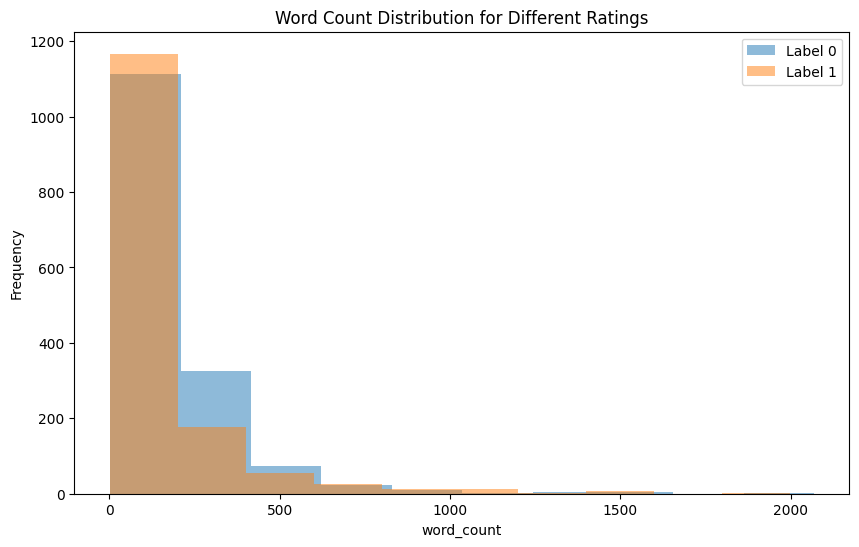

Test for column word_count_after_stopwords
Shapiro-Wilk test p-value for Label 0: 0.0
Shapiro-Wilk test p-value for Label 1: 0.0
Mann-Whitney U Test p-value: 1.2425905763237123e-42
The means of the two labels are significantly different (using Mann-Whitney U Test).


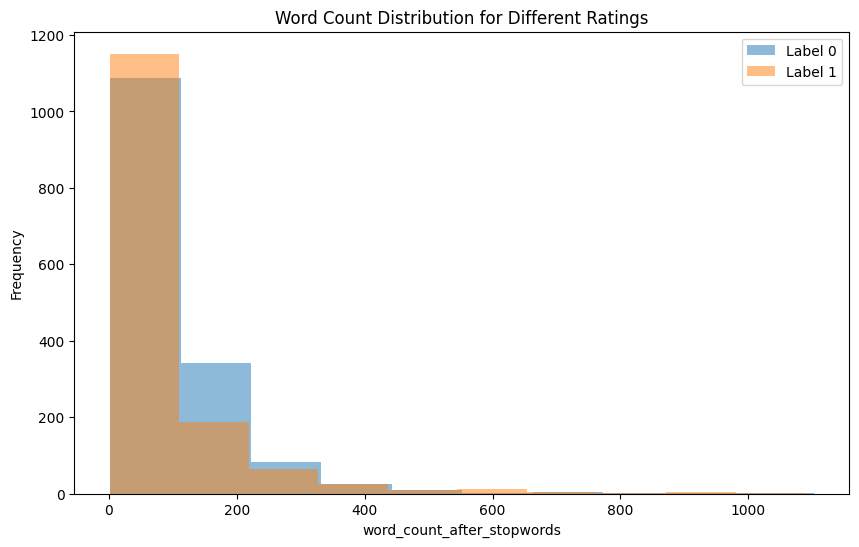

Test for column refer
Rating     0     1
refer             
False    544  1214
True    1013   244
Chi-Square test p-value: 6.830411510614437e-159
The distributions of the two labels are significantly different (using Chi-Square test).
Test for column count_emoji
Shapiro-Wilk test p-value for Label 0: 0.0
Shapiro-Wilk test p-value for Label 1: 0.0
Mann-Whitney U Test p-value: 0.5394736835254341
The means of the two labels are not significantly different (using Mann-Whitney U Test).


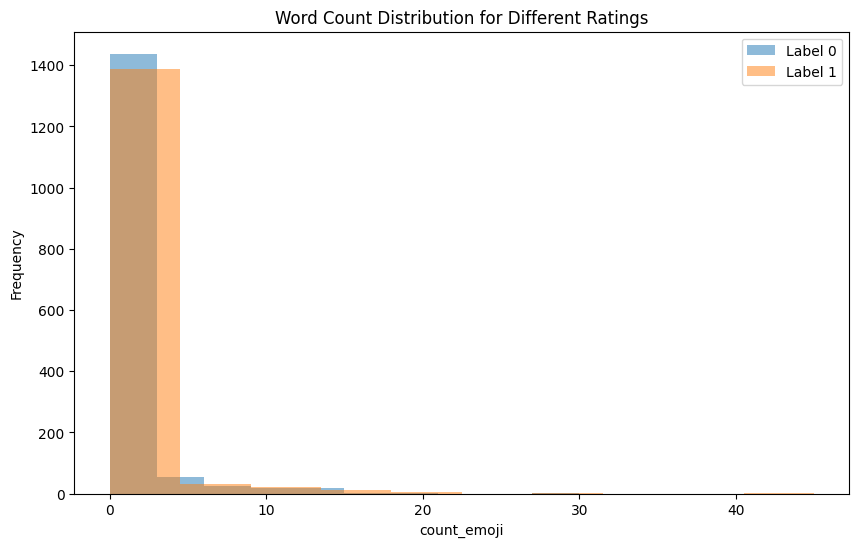

Test for column repeated_word_ratio
Shapiro-Wilk test p-value for Label 0: 1.401298464324817e-45
Shapiro-Wilk test p-value for Label 1: 0.0
Mann-Whitney U Test p-value: 2.635617252181055e-10
The means of the two labels are significantly different (using Mann-Whitney U Test).


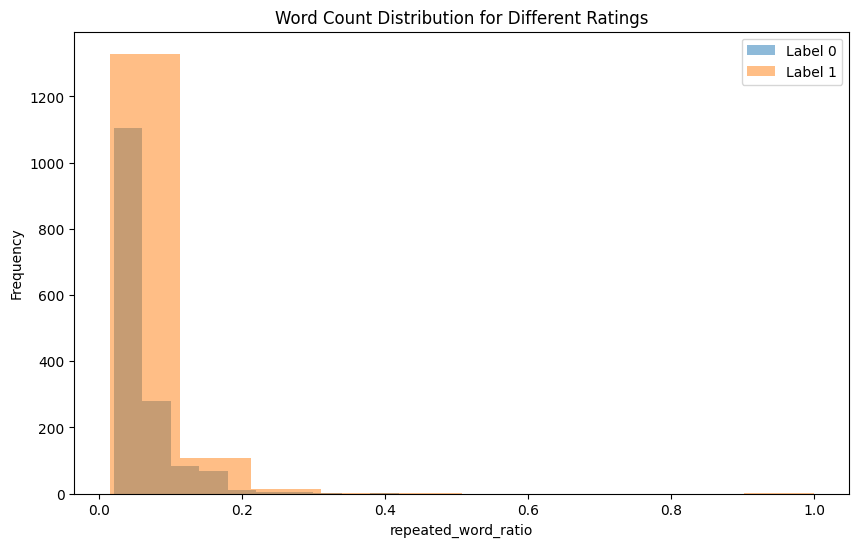

In [ ]:
test_stat_dif_mean('word_count')
test_stat_dif_mean('word_count_after_stopwords')
test_stat_dif_mean('refer')
test_stat_dif_mean('count_emoji')
test_stat_dif_mean('repeated_word_ratio')

# Visualize


In [ ]:
data.head()

claim  \
0  ฝากแชร์ค่ะ🙏\n**เนื่องจากช่วงนี้ โควิดระบาดหนัก วิดิโอคลิปซึ่งจัดทำโดยทีมสาขาเวชศาสตร์ฟื้นฟูหัวใจ ภาควิชาเวชศาสตร์ฟื้นฟู คณะแพทยศาสตร์ศิริราชพยาบาล จึงน่าจะเป็นประโยชน์แก่ผู้ป่วยทั้งในระยะที่รอเตียงที่บ้าน อยู่ในโรงพยาบาล/ hospitel และหลังหายป่วยกลับไปพักฟื้นที่บ้าน\n\nท่านสามารถเลือกใช้ตามวัตถุป...   
1                                                                                                                                                   จีนทุ่มปลูกฟ้าทะลายโจร ในแถบมณฑลกวางสี\nเป็นพันๆไร่สุดลูกหูลูกตา เพื่อใช้สู้ covid \nในขณะที่ไทยเรา\nยังทะเลาะกันเรื่องประสิทธิภาพกันอยู่เลย น่าเศร้าจริงๆ   
2                                                                 #ไปหาซื้อมากินกัน\n#สมุนไพรทางเลือกอีกตัวหนึ่ง\n#ยาKERRA_ต้านcovid-19   \n#กินแล้วหาย ภายใน 3-5 วัน ใช้ได้ผลจริง ที่โรงพยาบาลสนาม จ.ปทุมธานี ใช้กับผู้ป่วย 4000 กว่ารายใครไม่เป็นก็กินได้ ป้องกันได้ 100% \n\nhttps://youtu.be/PCO5nbZsu_8\n   
3  มีข่าวดีและพิเศษมาก เหยื่อโควิด-19 ชาวเวียดนามไม่มีผู้เสียชีวิตแล้ว ข่าวใหญ่สุดยอด จากการได้รับข้อมูลยาโควิด-19 จากประเทศเวียดนามเรียบร้อยแล้ว ไวรัสโควิด-19 จะไม่สามารถทำให้เราป่วยหรือตายได้รับรองว่า เป็นความจริง วิธีการง่ายมาก แต่ผลลัพธ์ดี แค่นำชาร้อน 1 กา และมะนาว 2 ลูก ผสมกันแล้วดื่ม สามารถฆ่...   
4  คำแนะนำในโรงพยาบาลกักกัน (เราสามารถนำไปใช้ที่บ้านได้) - ยาที่ดำเนินการในโรงพยาบาลกักกัน\n 1. วิตามินซี -1000\n 2. วิตามินอี (E)\n 3. เวลา 10.00-11.00 น. นั่งตากแดด 15-20 นาที\n 4. อาหารไข่วันละครั้ง\n 5. เราพักผ่อน / นอนหลับอย่างน้อย 7-8 ชั่วโมง\n 6. ทุกวันเราดื่มน้ำ 1.5 ลิตร\n 7. อาหารทุกมื้อต้...   

   Rating source Original_Rating  \
0       0   Line            จริง   
1       1   Line            ปลอม   
2       1   Line            ปลอม   
3       1   Line            ปลอม   
4       1   Line            ปลอม   

                                                                                                                                                                                                                                                                                                   clean_claim  \
0  ฝากแชร์ค่ะ เนื่องจากช่วงนี้ โควิดระบาดหนัก วิดิโอคลิปซึ่งจัดทำโดยทีมสาขาเวชศาสตร์ฟื้นฟูหัวใจ ภาควิชาเวชศาสตร์ฟื้นฟู คณะแพทยศาสตร์ศิริราชพยาบาล จึงน่าจะเป็นประโยชน์แก่ผู้ป่วยทั้งในระยะที่รอเตียงที่บ้าน อยู่ในโรงพยาบาล hospitel และหลังหายป่วยกลับไปพักฟื้นที่บ้านท่านสามารถเลือกใช้ตามวัตถุประสงค์ โด...   
1                                                                                                                                                         จีนทุ่มปลูกฟ้าทะลายโจร ในแถบมณฑลกวางสีเป็นพันๆไร่สุดลูกหูลูกตา เพื่อใช้สู้ โควิด ในขณะที่ไทยเรายังทะเลาะกันเรื่องประสิทธิภาพกันอยู่เลย น่าเศร้าจริงๆ   
2                                                                                                         ไปหาซื้อมากินกันสมุนไพรทางเลือกอีกตัวหนึ่งยาKERRAต้านโควิด   กินแล้วหาย ภายใน  วัน ใช้ได้ผลจริง ที่โรงพยาบาลสนาม จปทุมธานี ใช้กับผู้ป่วย  กว่ารายใครไม่เป็นก็กินได้ ป้องกันได้  httpsyoutubePCOnbZsu   
3  มีข่าวดีและพิเศษมาก เหยื่อโควิด ชาวเวียดนามไม่มีผู้เสียชีวิตแล้ว ข่าวใหญ่สุดยอด จากการได้รับข้อมูลยาโควิด จากประเทศเวียดนามเรียบร้อยแล้ว ไวรัสโควิด จะไม่สามารถทำให้เราป่วยหรือตายได้รับรองว่า เป็นความจริง วิธีการง่ายมาก แต่ผลลัพธ์ดี แค่นำชาร้อน  กา และมะนาว  ลูก ผสมกันแล้วดื่ม สามารถฆ่าไวรัสโควิด...   
4  คำแนะนำในโรงพยาบาลกักกัน เราสามารถนำไปใช้ที่บ้านได้  ยาที่ดำเนินการในโรงพยาบาลกักกัน  วิตามินซี   วิตามินอี E  เวลา  น นั่งตากแดด  นาที  อาหารไข่วันละครั้ง  เราพักผ่อน  นอนหลับอย่างน้อย  ชั่วโมง  ทุกวันเราดื่มน้ำ  ลิตร  อาหารทุกมื้อต้องทานแบบร้อน ไม่เย็น นี่คือสิ่งที่เราทำในโรงพยาบาลเพื่อเสริมสร...   

   count_emoji  refer  \
0            1      1   
1            0      0   
2            0      1   
3            0      0   
4            0      0   

                                                                                                                                                                                                                                                               

In [ ]:
real = []
for i in data[data['Rating']==0]['token']:
  real.append(i)


In [ ]:
fake = []
for i in data[data['Rating']==1]['token']:
  fake.append(i)

In [ ]:
all = []
for i in data['token']:
   all.append(i)

Fake word cloud


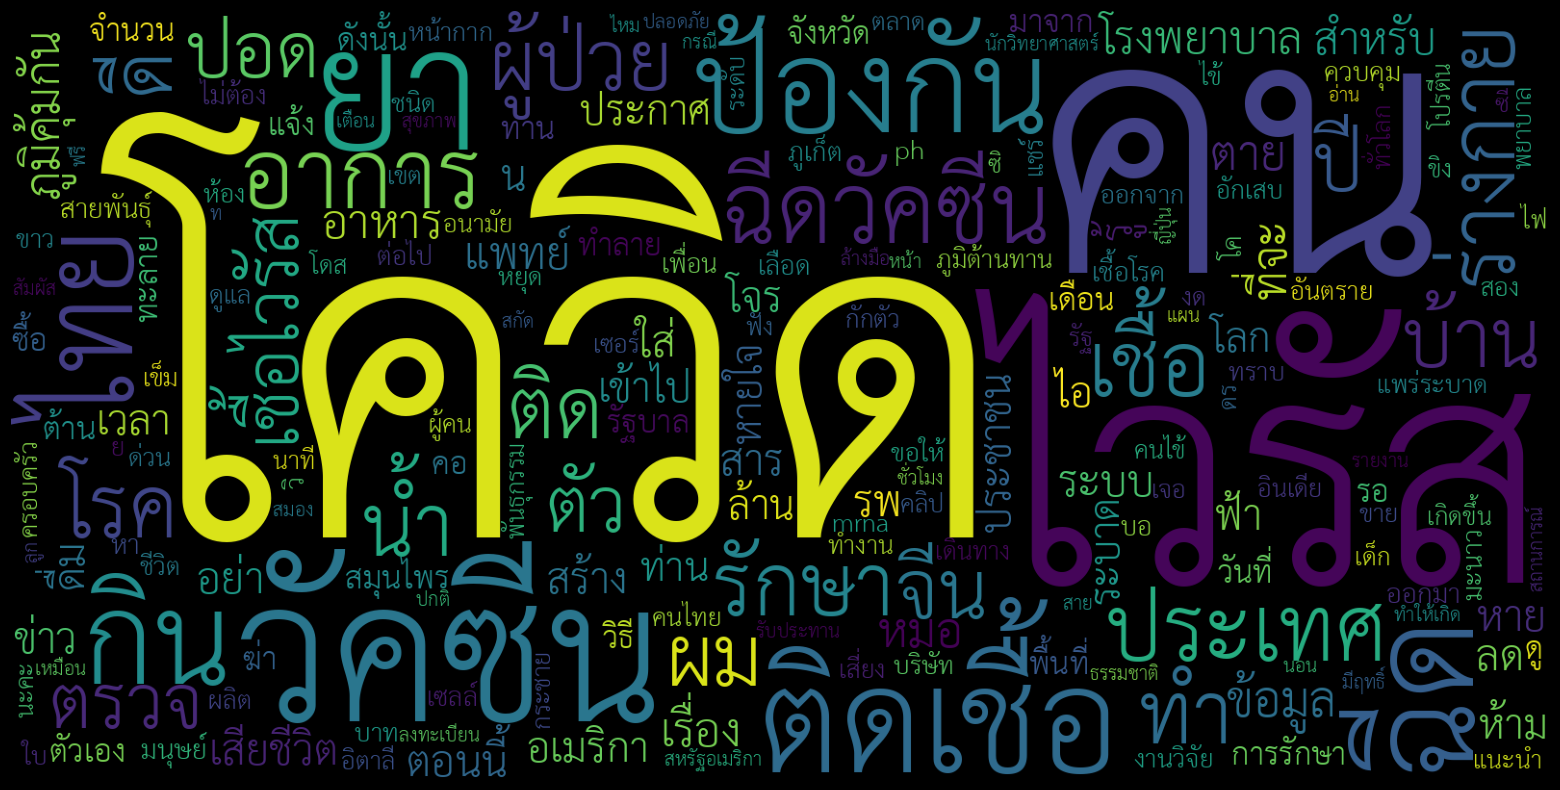

In [ ]:
unique_string=(" ").join([str(c) for c in fake])
unique_string = unique_string.replace("'","")
print("Fake word cloud")
wordcloud = WordCloud(width=1600, height=800,font_path=font_path,regexp=regexp,collocations = False).generate(unique_string)
# Open a plot of the generated image.
plt.figure( figsize=(20,10),facecolor = 'k')
plt.imshow(wordcloud)
plt.axis("off")
# plt.tight_layout(pad=0)
plt.show()

Real word cloud


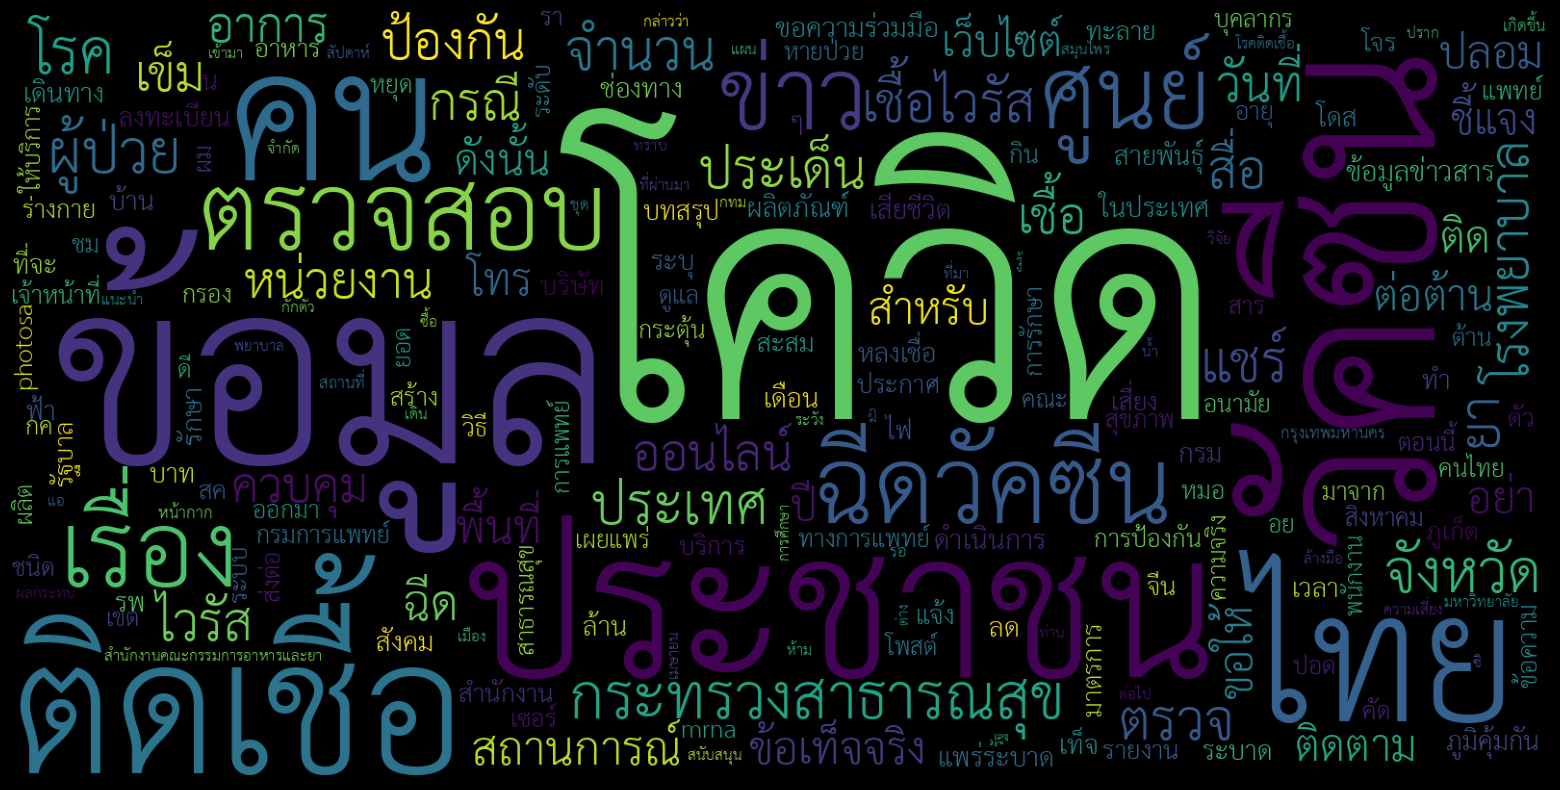

In [ ]:
unique_string=(" ").join([str(c) for c in real])
unique_string = unique_string.replace("'","")
print("Real word cloud")
wordcloud = WordCloud(width=1600, height=800,font_path=font_path,regexp=regexp,collocations = False).generate(unique_string)
# Open a plot of the generated image.
plt.figure( figsize=(20,10),facecolor = 'k')
plt.imshow(wordcloud)
plt.axis("off")
# plt.tight_layout(pad=0)
plt.show()

All word cloud


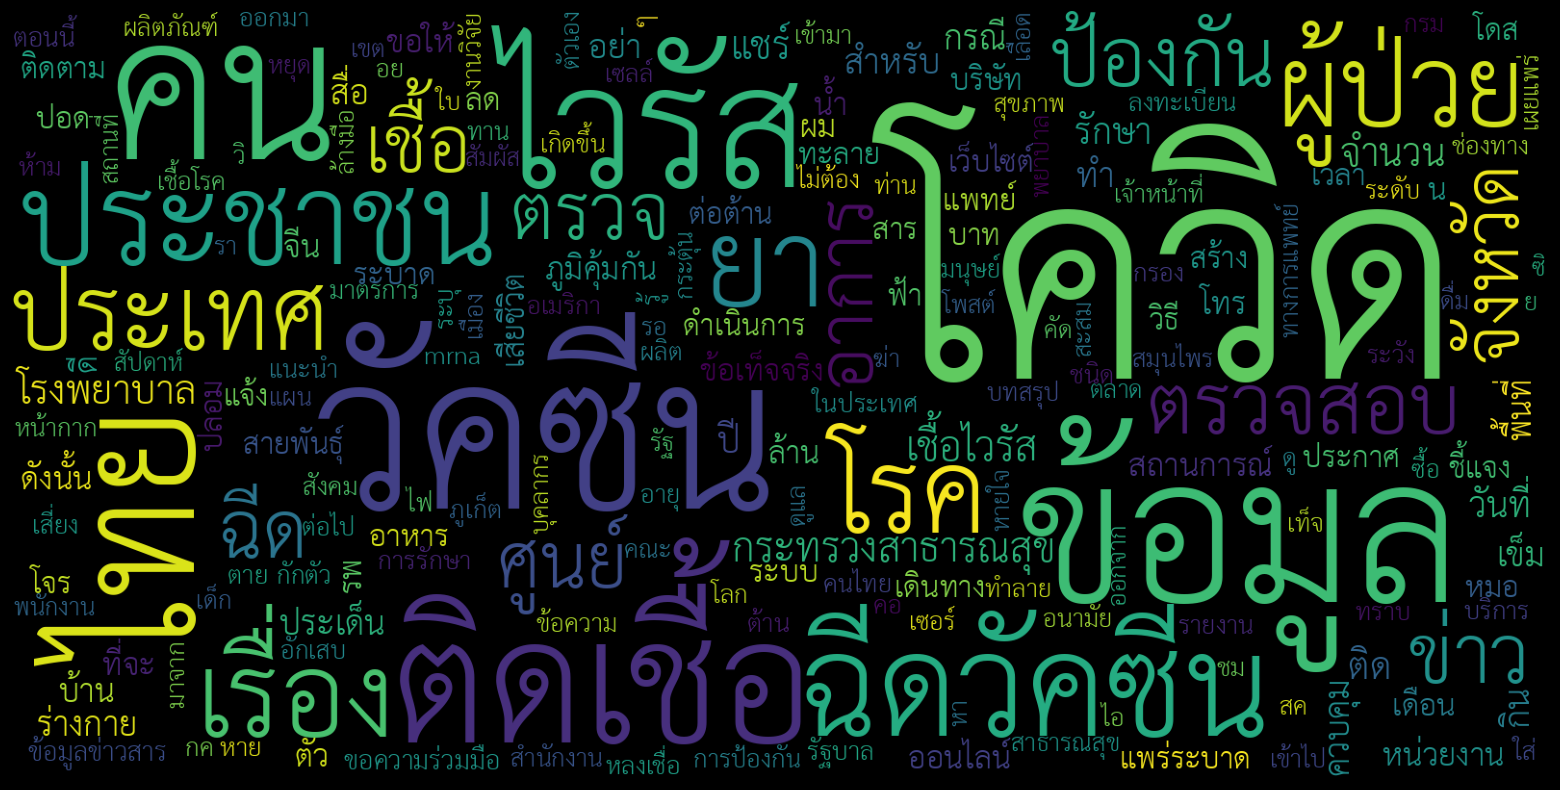

In [ ]:
unique_string=(" ").join([str(c) for c in all])
unique_string = unique_string.replace("'","")
print("All word cloud")
wordcloud = WordCloud(width=1600, height=800,font_path=font_path,regexp=regexp,collocations = False).generate(unique_string)
# Open a plot of the generated image.
plt.figure( figsize=(20,10),facecolor = 'k')
plt.imshow(wordcloud)
plt.axis("off")
# plt.tight_layout(pad=0)
plt.show()

## Descriptive Stat

In [ ]:
data['Rating'].unique()

array([0, 1])

In [ ]:
data[(data['Rating']==1)].describe()

Rating  count_emoji        refer   word_count
count  1458.0  1458.000000  1458.000000  1458.000000
mean      1.0     0.780521     0.167353   137.965021
std       0.0     2.994592     0.373418   212.497779
min       1.0     0.000000     0.000000     0.000000
25%       1.0     0.000000     0.000000    27.000000
50%       1.0     0.000000     0.000000    58.000000
75%       1.0     0.000000     0.000000   157.000000
max       1.0    45.000000     1.000000  1999.000000

In [ ]:
data[(data['Rating']==0)].describe()

Rating  count_emoji       refer   word_count
count  1557.0  1557.000000  1557.00000  1557.000000
mean      0.0     0.721901     0.65061   170.454721
std       0.0     2.392762     0.47693   189.154987
min       0.0     0.000000     0.00000     3.000000
25%       0.0     0.000000     0.00000    59.000000
50%       0.0     0.000000     1.00000   102.000000
75%       0.0     0.000000     1.00000   224.000000
max       0.0    30.000000     1.00000  2069.000000

In [ ]:
data[data['word_count']>400].shape

(238, 9)

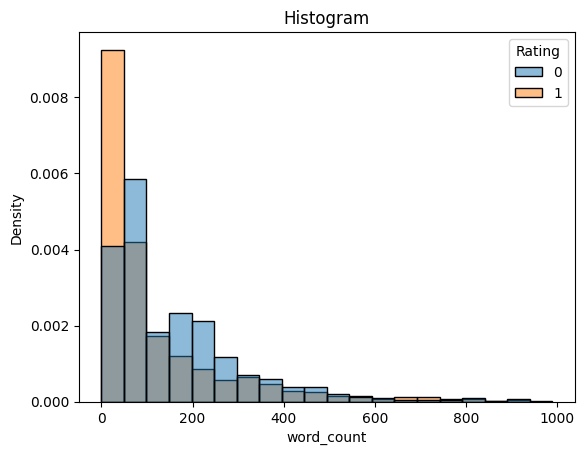

In [ ]:
import seaborn as sns
sns.histplot(data=data[data['word_count']<1000], x='word_count', hue='Rating', bins=20,stat='density', common_norm=False);
plt.title("Histogram");

In [ ]:
data['Type of News'] = data['Rating'].apply(lambda x:'Fake News' if x == 1 else 'Real News')

In [ ]:
data['contains url']  = data['refer'].apply(lambda x:'Yes' if x == 1 else 'No')

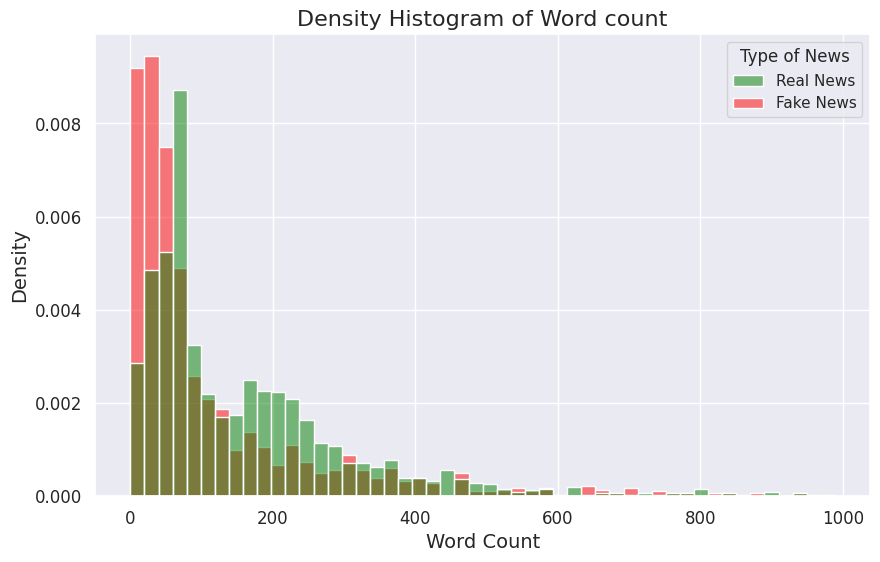

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set a black background
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a custom color palette for the histogram bars
custom_colors = {'Real News': 'green', 'Fake News': 'red'}
sns.histplot(data=data[data['word_count'] < 1000], x='word_count', hue='Type of News', bins=50,
             stat='density', common_norm=False, palette=custom_colors, alpha=0.5)

# Add thicker lines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add labels and title
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Density Histogram of Word count', fontsize=16)

# Show the plot
# plt.legend(title='Rating', title_fontsize=12, fontsize=12)
# plt.tight_layout()
plt.show()

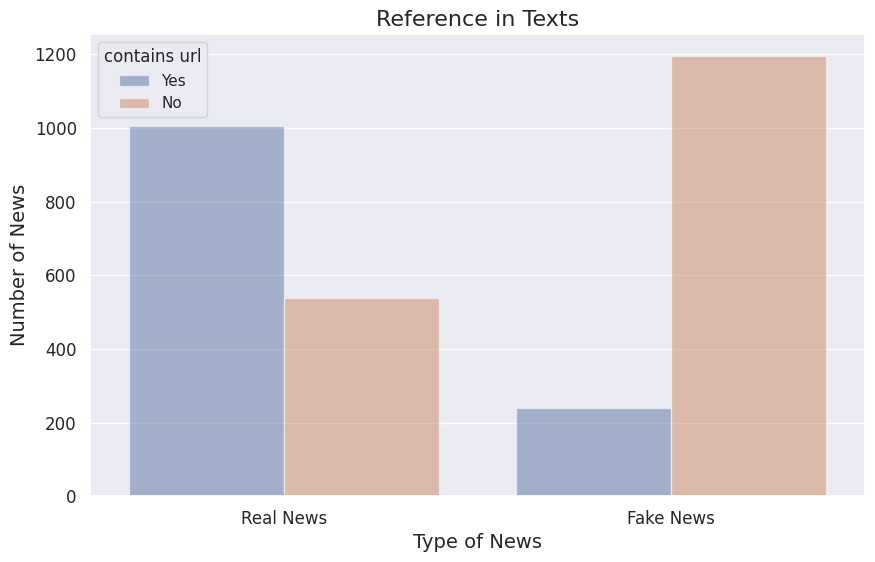

In [ ]:
# Set a black background
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a custom color palette for the histogram bars
sns.countplot(data=data[data['word_count'] < 1000], x='Type of News', hue='contains url',
              alpha=0.5)

# Add thicker lines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add labels and title
plt.xlabel('Type of News', fontsize=14)
plt.ylabel('Number of News', fontsize=14)
plt.title('Reference in Texts', fontsize=16)

# Show the plot
# plt.legend(title='Rating', title_fontsize=12, fontsize=12)
# plt.tight_layout()
plt.show()

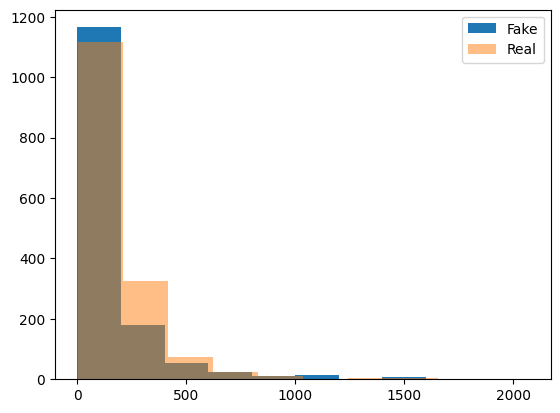

In [ ]:
plt.hist(data[data['Rating']==1]['word_count'], bins = 10,alpha =  1,label = 'Fake') #fake
plt.hist(data[data['Rating']==0]['word_count'], bins = 10,alpha =  0.5,label = 'Real') #real
plt.legend(loc='upper right')
plt.show()

In [ ]:
real_corpus = {}
for list_ in data[data['Rating']==0]['token']:
  for word in list_:
    if word in real_corpus.keys():
      real_corpus[word] +=1
    else : real_corpus[word] = 1
real_corpus = dict(sorted(real_corpus.items(), key=lambda item: item[1],reverse=True))

In [ ]:
fake_corpus = {}
for list_ in data[data['Rating']==1]['token']:
  for word in list_:
    if word in fake_corpus.keys():
      fake_corpus[word] +=1
    else : fake_corpus[word] = 1
fake_corpus = dict(sorted(fake_corpus.items(), key=lambda item: item[1],reverse=True))

['โควิด', 'ข้อมูล', 'วัคซีน', 'ประชาชน', 'ติดเชื้อ', 'คน', 'ไทย', 'ตรวจสอบ', 'ฉีดวัคซีน', 'เรื่อง', 'ศูนย์', 'ข่าว', 'กระทรวงสาธารณสุข', 'โรค', 'ผู้ป่วย', 'จังหวัด', 'แชร์', 'ประเทศ', 'ตรวจ', 'จำนวน']


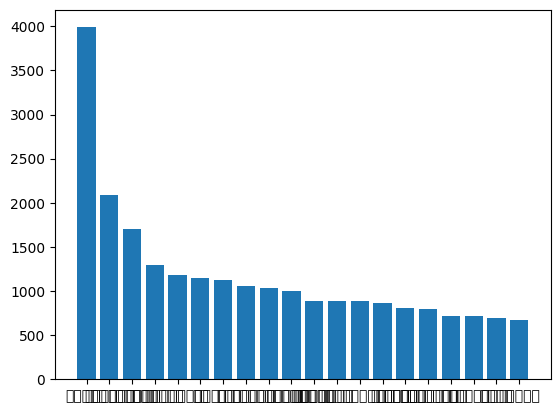

In [ ]:
keys = list(real_corpus.keys())[:20]
values = list(real_corpus.values())[:20]

plt.bar(keys, values)
print(keys)

['โควิด', 'คน', 'ไวรัส', 'วัคซีน', 'ยา', 'ติดเชื้อ', 'ฉีด', 'ป้องกัน', 'กิน', 'ไทย', 'ฉีดวัคซีน', 'อาการ', 'ประเทศ', 'ร่างกาย', 'เชื้อ', 'ทำ', 'โรค', 'รักษา', 'น้ำ', 'ติด']


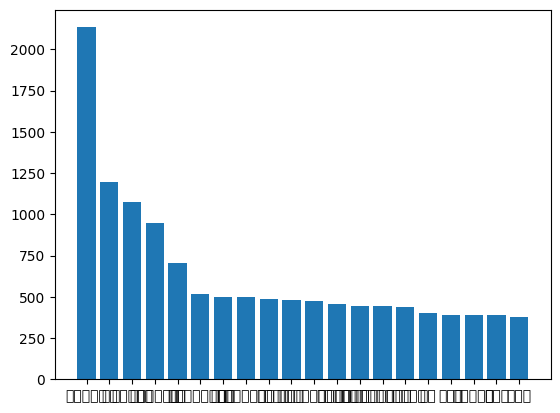

In [ ]:
keys = list(fake_corpus.keys())[:20]
values = list(fake_corpus.values())[:20]

plt.bar(keys, values)
print(keys)

In [ ]:
from collections import Counter
fake = Counter(fake_corpus)
print(fake.most_common(20))

[('โควิด', 2132), ('คน', 1196), ('ไวรัส', 1075), ('วัคซีน', 947), ('ยา', 701), ('ติดเชื้อ', 515), ('ฉีด', 500), ('ป้องกัน', 497), ('กิน', 488), ('ไทย', 480), ('ฉีดวัคซีน', 472), ('อาการ', 456), ('ประเทศ', 443), ('ร่างกาย', 443), ('เชื้อ', 437), ('ทำ', 404), ('โรค', 391), ('รักษา', 391), ('น้ำ', 388), ('ติด', 375)]


In [ ]:
real = Counter(real_corpus)
print(real.most_common(20))

[('โควิด', 3986), ('ข้อมูล', 2093), ('วัคซีน', 1708), ('ประชาชน', 1299), ('ติดเชื้อ', 1182), ('คน', 1150), ('ไทย', 1127), ('ตรวจสอบ', 1057), ('ฉีดวัคซีน', 1035), ('เรื่อง', 999), ('ศูนย์', 892), ('ข่าว', 888), ('กระทรวงสาธารณสุข', 884), ('โรค', 860), ('ผู้ป่วย', 809), ('จังหวัด', 791), ('แชร์', 720), ('ประเทศ', 712), ('ตรวจ', 689), ('จำนวน', 674)]


In [ ]:
data[data['Rating'] == 0].shape

(1557, 9)

In [ ]:
data[data['Rating'] == 1].shape

(1458, 9)

In [ ]:
# for item, count in fake.items():
#     fake[item] /= 1458
for item, count in real.items():
    real[item] /= 1557

In [ ]:
print(fake.most_common(20))

[('โควิด', 1.4622770919067216), ('คน', 0.8203017832647462), ('ไวรัส', 0.7373113854595336), ('วัคซีน', 0.649519890260631), ('ยา', 0.48079561042524005), ('ติดเชื้อ', 0.3532235939643347), ('ฉีด', 0.3429355281207133), ('ป้องกัน', 0.34087791495198905), ('กิน', 0.3347050754458162), ('ไทย', 0.3292181069958848), ('ฉีดวัคซีน', 0.32373113854595337), ('อาการ', 0.31275720164609055), ('ประเทศ', 0.303840877914952), ('ร่างกาย', 0.303840877914952), ('เชื้อ', 0.2997256515775034), ('ทำ', 0.27709190672153633), ('โรค', 0.2681755829903978), ('รักษา', 0.2681755829903978), ('น้ำ', 0.2661179698216735), ('ติด', 0.257201646090535)]


In [ ]:
print(real.most_common(20))

[('โควิด', 2.5600513808606293), ('ข้อมูล', 1.344251766217084), ('วัคซีน', 1.096981374438022), ('ประชาชน', 0.8342967244701349), ('ติดเชื้อ', 0.7591522157996147), ('คน', 0.7385998715478485), ('ไทย', 0.7238278741168914), ('ตรวจสอบ', 0.6788696210661529), ('ฉีดวัคซีน', 0.6647398843930635), ('เรื่อง', 0.6416184971098265), ('ศูนย์', 0.5728965960179833), ('ข่าว', 0.5703275529865125), ('กระทรวงสาธารณสุข', 0.5677585099550417), ('โรค', 0.552344251766217), ('ผู้ป่วย', 0.5195889531149647), ('จังหวัด', 0.5080282594733462), ('แชร์', 0.4624277456647399), ('ประเทศ', 0.45728965960179835), ('ตรวจ', 0.4425176621708414), ('จำนวน', 0.43288375080282593)]


Text(0.5, 1.0, 'Fake')

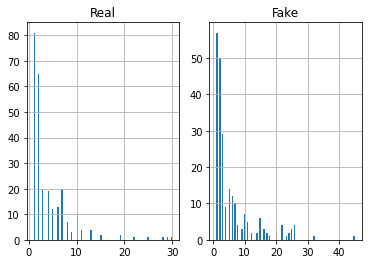

In [ ]:
fig, axes = plt.subplots(1, 2)
data[(data['Rating']==0) & (data['count_emoji']!=0)]['count_emoji'].hist(bins=100, ax=axes[0]).set_title('Real')
data[(data['Rating']==1) & (data['count_emoji']!=0)]['count_emoji'].hist(bins=100, ax=axes[1]).set_title('Fake')

In [ ]:
print("Real data have no emoji :",len(data[(data['Rating']==0) & (data['count_emoji']==0)]['count_emoji']))
print("Fake data have no  emoji :",len(data[(data['Rating']==1) & (data['count_emoji']==0)]['count_emoji']))

Real data have no emoji : 1290
Fake data have no  emoji : 1224


In [ ]:
data.Rating.value_counts()

0    1557
1    1458
Name: Rating, dtype: int64

In [ ]:
print("Refer for real news")
print(data[data['Rating']==0]['refer'].value_counts()) #real

print("Refer for fake news")
print(data[data['Rating']==1]['refer'].value_counts()) #Fake

Refer for real news
1    1013
0     544
Name: refer, dtype: int64
Refer for fake news
0    1214
1     244
Name: refer, dtype: int64


In [ ]:
data[data['Rating']==0]['count_emoji'].median()

0.0

In [ ]:
data[data['Rating']==1]['count_emoji'].median()

0.0

In [ ]:
data['count_emoji'].value_counts()

In [ ]:
data[data['word_count']==0]

claim  Rating  ... token word_count
2607  https://youtu.be/FI-6rdBnKqA       1  ...    []          0
2689  https://youtu.be/ZMXbkA9D33M       1  ...    []          0

[2 rows x 9 columns]

In [ ]:
data = data[data['word_count'] !=0 ]

In [ ]:
print("Real")
data[data['Rating']==0]['word_count'].describe()

Real


count    1557.000000
mean      170.804753
std       189.774790
min         3.000000
25%        59.000000
50%       102.000000
75%       224.000000
max      2094.000000
Name: word_count, dtype: float64

In [ ]:
data[data['Rating']==0]['word_count'].skew()

3.500314315016549

In [ ]:
print("Fake")
data[data['Rating']==1]['word_count'].describe()

Fake


count    1456.000000
mean      138.401099
std       212.991925
min         3.000000
25%        27.000000
50%        58.000000
75%       157.500000
max      1999.000000
Name: word_count, dtype: float64

In [ ]:
data[data['Rating']==1]['word_count'].skew()

3.5472900546124024

In [ ]:
print("Median for Real Word count : ",data[data['Rating']==0]['word_count'].mean())
print("Mean for Real Word count : ",data[data['Rating']==0]['word_count'].median())
print("Mode for Real Word count : ",data[data['Rating']==0]['word_count'].mode())
print("Median for Fake Word count : ",data[data['Rating']==1]['word_count'].mean())
print("Mean for Fake Word count : ",data[data['Rating']==1]['word_count'].median())
print("Mode for Fake Word count : ",data[data['Rating']==1]['word_count'].mode())

Median for Real Word count :  170.80475272960823
Mean for Real Word count :  102.0
Mode for Real Word count :  0    73
dtype: int64
Median for Fake Word count :  138.4010989010989
Mean for Fake Word count :  58.0
Mode for Fake Word count :  0    13
1    15
dtype: int64


Text(0.5, 1.0, 'Fake')

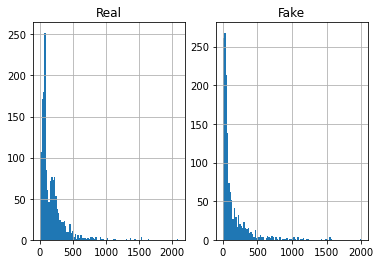

In [ ]:
fig, axes = plt.subplots(1, 2)
data[(data['Rating']==0)]['word_count'].hist(bins=100, ax=axes[0]).set_title('Real')
data[(data['Rating']==1)]['word_count'].hist(bins=100, ax=axes[1]).set_title('Fake')

# split data

In [ ]:
X = data['token']
y = data['Rating']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=42) #for logistic
X_train_rnn, X_valid, y_train_rnn,y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42) #for rnn
#########################################################################
X_train, X_valid, y_train,y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42) #for logistic 72%

## convert word

In [ ]:
def featurize(token_list):
    features = {}
    for token in token_list:
        features[token] = 1
    return features

In [ ]:
#logistic regression
vectorizer = DictVectorizer(sparse=True) #แบบ DictVectorizer
train_features = X_train.apply(featurize)
test_features = X_test.apply(featurize)
train_vectors = vectorizer.fit_transform(train_features)
test_vectors = vectorizer.transform(test_features)
train_vectors_array = np.array(train_vectors.todense())
test_vectors_array = np.array(test_vectors.todense())

valid_features = X_valid.apply(featurize)
valid_vectors = vectorizer.transform(valid_features)
valid_vectors_array = np.array(valid_vectors.todense())

## Prepare for Rnn

In [ ]:
l = []
for row in train_features:
  l.append(list(row.keys()))

In [ ]:
a = []
for words in l:
  for word in words:
    a.append(word)

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  #print(results.shape)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [ ]:
#word embedding
#ต้องได้ข้อมูลมาเป็นลิสต์ก่อนถึงจะเข้าอันนี้ได้
from gensim.models import Word2Vec
# สร้างและ train Word2Vec model
model_vocab = Word2Vec(sentences=data['token'], window=5, min_count=5, workers=4, sg=0)
# model = Word2Vec.load('http://www.arts.chula.ac.th/ling/wp-content/uploads/TNCc5model.bin').wv

# see current settings
print(model_vocab.__dict__)

{'vector_size': 100, 'workers': 4, 'epochs': 5, 'train_count': 1, 'total_train_time': 3.2646534959976634, 'batch_words': 10000, 'sg': 0, 'alpha': 0.025, 'min_alpha': 0.0001, 'window': 5, 'shrink_windows': True, 'random': RandomState(MT19937) at 0x7AE38395BB40, 'hs': 0, 'negative': 5, 'ns_exponent': 0.75, 'cbow_mean': 1, 'compute_loss': False, 'running_training_loss': 0.0, 'min_alpha_yet_reached': 0.00025361194029850653, 'corpus_count': 3015, 'corpus_total_words': 263857, 'max_final_vocab': None, 'max_vocab_size': None, 'min_count': 5, 'sample': 0.001, 'sorted_vocab': 1, 'null_word': 0, 'cum_table': array([  19218720,   29488229,   38931268, ..., 2147297970, 2147390808,
       2147483647], dtype=uint32), 'raw_vocab': defaultdict(<class 'int'>, {}), 'wv': <gensim.models.keyedvectors.KeyedVectors object at 0x7ae37e794c40>, 'hashfxn': <built-in function hash>, 'seed': 1, 'layer1_size': 100, 'comment': None, 'load': <function call_on_class_only at 0x7ae37e35cd30>, 'effective_min_count': 5, 

In [ ]:
# หา vocabulary ของชุดข้อมูลทั้งหมดจากเอกสารของเรา
best_vocabs = set()
for doc in data['token']:
    best_vocabs=best_vocabs.union(set(doc))

# จำนวนคำใน vocabulary ของโมเดล pretrained
print(len(model_vocab.wv.vocab))

AttributeError: ignored

In [ ]:
# update vocabulary ของโมเดล
model_vocab.build_vocab(data['token'],update=True)

# จำนวนคำใน vocabulary ของหลังจากที่ update ด้วย vocabulary ของข้อมูลของเรา
print(len(model_vocab.wv.vocab))

AttributeError: ignored

In [ ]:
# # # train โมเดล
# model_vocab.train(sentences=data['token'],total_examples=len(data['token']),epochs=300)
model_vocab.train(sentences=X_train_rnn['token'],total_examples=len(data['token']),epochs=300) #เทรนแค่ชุดข้อมูลเทรน

KeyError: ignored

In [ ]:
data['token'][1][2]

In [ ]:
# model_vocab.save('vocab_initialized_model.w2v')
model_vocab = Word2Vec.load('/content/drive/MyDrive/vocab_initialized_model.w2v')
print(model_vocab.wv.most_similar(data['token'][1][2]))

[('กะเพรา', 0.6238046884536743), ('ลำต้น', 0.5480901002883911), ('เพาะปลูก', 0.511246919631958), ('แปลง', 0.5109915733337402), ('เก็บเกี่ยว', 0.49892401695251465), ('รดน้ำ', 0.4640341103076935), ('เด็ด', 0.46144238114356995), ('ฟาง', 0.4319477081298828), ('ออกดอก', 0.4220053553581238), ('เมล็ดพันธุ์', 0.4158279001712799)]


In [ ]:
print(model_vocab.wv.most_similar('โควิด'))

[('โรค', 0.5328567624092102), ('ติดเชื้อ', 0.508336067199707), ('ผู้ป่วย', 0.44680508971214294), ('ป้องกัน', 0.443916916847229), ('เชื้อไวรัส', 0.4080381393432617), ('ไวรัส', 0.40660229325294495), ('ไทย', 0.4048967659473419), ('จำนวน', 0.40020671486854553), ('คน', 0.3998900055885315), ('ประชาชน', 0.3909463584423065)]


In [ ]:
model_vocab.wv.key_to_index.keys()
my_dict = dict({})
for idx, key in enumerate(model_vocab.wv.key_to_index):
    my_dict[key] = model_vocab.wv[key]

In [ ]:
x = set(list(my_dict.keys()))
a = set(a)
y = a-x # ดูว่า y ปรากฏในดาต้าเซ็ทกี่ครั้ง

In [ ]:
y

In [ ]:
c = 0
for i in data['token'] :
  for j in i :
    if j == 'หว่า':
      c = c+1
print(c)


3


In [ ]:
def map_vector(list_,dict_ = my_dict):
  return [dict_[word] for word in list_ if word in dict_ else vector_2]

In [ ]:
my_dict['โควิด']

array([-0.10684759,  0.5519511 ,  1.1238754 ,  2.6976995 ,  0.4432121 ,
        0.6146011 , -2.8452806 ,  1.9195199 ,  2.0770571 ,  3.2619293 ,
        1.3248175 ,  0.65068877, -2.119213  ,  0.57338053,  1.6671813 ,
       -0.2293202 ,  0.35793346,  0.8439136 , -0.9999748 ,  0.69549483,
        0.7835598 , -0.9117795 ,  0.7226584 ,  0.91903234, -0.5193511 ,
       -1.3032339 , -1.8021106 ,  0.8330972 ,  0.0997801 ,  0.04528943,
       -0.3854176 , -0.0948866 ,  0.7640141 ,  1.4342561 ,  0.17551851,
       -0.9903813 ,  1.3808352 ,  1.5072287 ,  2.4161093 ,  0.08946802,
       -0.30009195,  2.0044835 , -2.2362628 ,  1.0417855 , -0.6027754 ,
       -2.1036494 , -0.91151655, -2.3473537 , -1.2894611 ,  0.49892733,
       -0.36384073, -0.30425423, -0.36948013,  2.6173687 ,  0.13243215,
        0.8916816 ,  0.7731609 , -3.1046066 , -1.306463  ,  1.143348  ,
        0.46450278,  0.90824234, -1.3026264 ,  0.43726534, -3.305859  ,
        2.1843133 ,  0.34771997,  0.49411106, -0.3795297 , -0.35

In [ ]:
X_test

In [ ]:
X_train_rnn = X_train_rnn.apply(map_vector)
X_valid_rnn = X_valid.apply(map_vector)
X_test_rnn = X_test.apply(map_vector)

In [ ]:
X_train_rnn = np.array(X_train_rnn)
X_test_rnn = np.array(X_test_rnn)
X_valid_rnn = np.array(X_valid_rnn)

# Build Model : Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def create_logistic(train_vectors,y_train,test_vectors,solv='lbfgs',penalty='l2',c=0.1):
  #  {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
    lr_text_classifier = LogisticRegression(solver= solv,penalty=penalty,C=c)
    lr_text_classifier.fit(train_vectors, y_train)
    predictions = lr_text_classifier.predict(test_vectors)
    prob = lr_text_classifier.predict_proba(test_vectors)
    prob_df_text = pd.DataFrame(prob,columns = ['Real_text','Fake_text'])
    print(prob_df_text.head())
    prob_df_text['text_predict'] = predictions
    importance = lr_text_classifier.coef_[0]
    return prob_df_text,importance

def print_report(train_vectors,y_train,test_vectors,y_test,solv='lbfgs',penalty='l2',c=0.1):
    prob_df_text,importance = create_logistic(train_vectors,y_train,test_vectors,solv= solv,penalty=penalty,c=c)
    print("Accuracy score : ",accuracy_score(y_test, prob_df_text['text_predict']))
    print(classification_report(y_test, prob_df_text['text_predict']))
    return prob_df_text,importance

In [ ]:
train_vectors[1]

<1x15546 sparse matrix of type '<class 'numpy.float64'>'
	with 35 stored elements in Compressed Sparse Row format>

In [ ]:
train_vectors.shape

(2713, 15546)

In [ ]:
prob_df_text,importance = print_report(train_vectors,y_train,test_vectors,y_test)

   Real_text  Fake_text
0   0.977052   0.022948
1   0.555460   0.444540
2   0.019854   0.980146
3   0.161925   0.838075
4   0.998983   0.001017
Accuracy score :  0.8311258278145696
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       172
           1       0.75      0.92      0.82       130

    accuracy                           0.83       302
   macro avg       0.84      0.84      0.83       302
weighted avg       0.85      0.83      0.83       302



In [ ]:
mapping = vectorizer.vocabulary_
vector_map = [(x,mapping[x]) for x in mapping]
vector_map.sort(key=lambda x:x[1])
vocab_vector = [x[0] for x in vector_map]
coef_dict = list(zip(vocab_vector,importance))
coef_dict = {x[0]:x[1] for x in coef_dict}
# coef_dict = sorted(coef_dict.items(), key=lambda x:x[1])

In [ ]:
tmp_coef_dict = coef_dict.copy()
for key,value in coef_dict.items():
  if key in stop_words:
    # print(key)
    del tmp_coef_dict[key]

In [ ]:
# tmp_coef_dict = {word: abs(coef) for word, coef in tmp_coef_dict.items()}

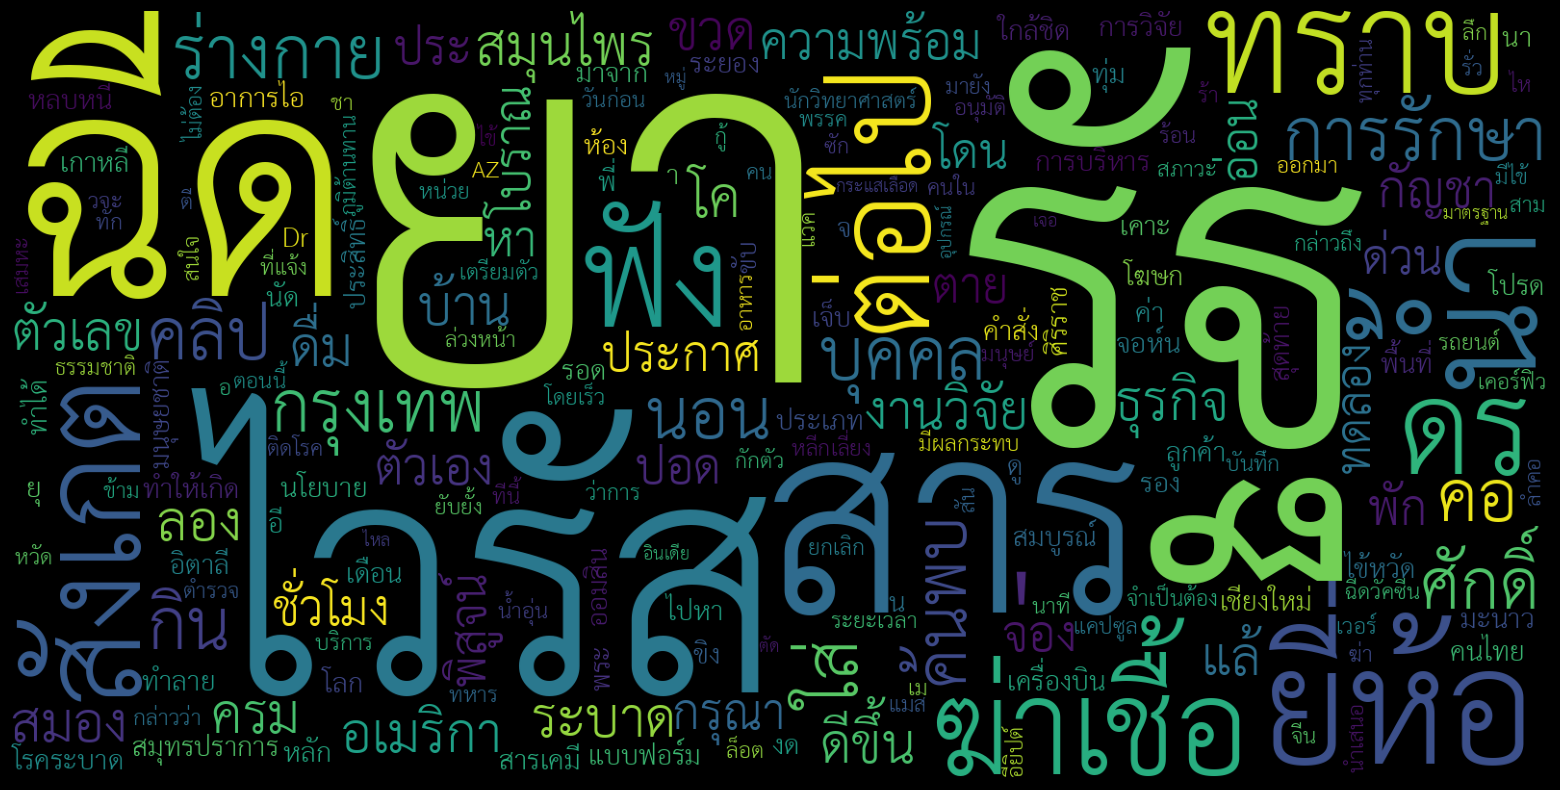

In [ ]:
wordcloud = WordCloud(width=1600, height=800,font_path=font_path,regexp=regexp,collocations = False)
wordcloud.generate_from_frequencies(tmp_coef_dict)
# Open a plot of the generated image.
plt.figure( figsize=(20,10),facecolor = 'k')
plt.imshow(wordcloud)
plt.axis("off")
# plt.tight_layout(pad=0)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

Accuracy on testing set: 0.8344370860927153
Precision on testing set: 0.9538461538461539
Recall on testing set: 0.7380952380952381
F1-score on testing set: 0.832214765100671


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

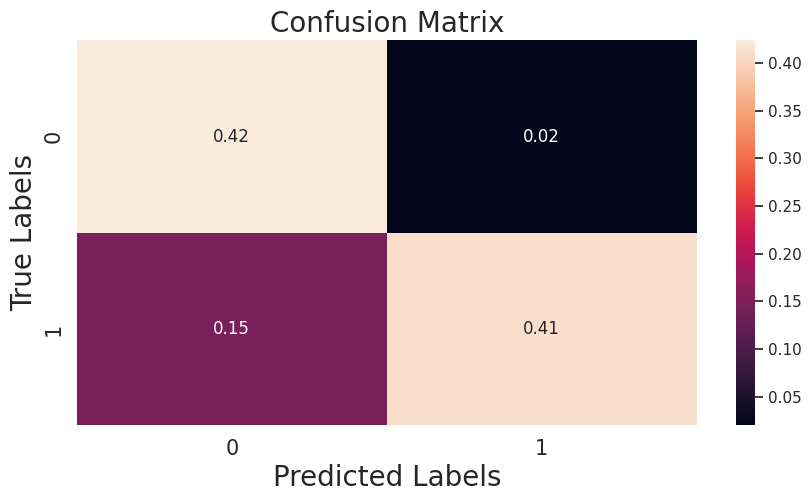

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
print('Accuracy on testing set:', accuracy_score(prob_df_text['text_predict'], y_test))
print('Precision on testing set:', precision_score(prob_df_text['text_predict'], y_test))
print('Recall on testing set:', recall_score(prob_df_text['text_predict'], y_test))
print('F1-score on testing set:', f1_score(prob_df_text['text_predict'], y_test))
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='dark')
matrix = confusion_matrix( , y_test, normalize='all')
plt.figure(figsize=(10, 5))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

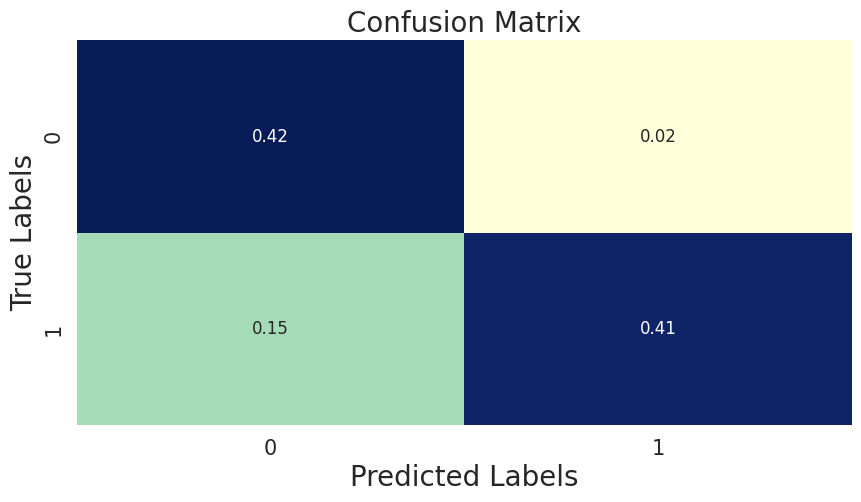

In [ ]:
matrix = confusion_matrix(prob_df_text['text_predict'], y_test, normalize='all')

# Set a black background
sns.set(style='dark')

plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax, cmap='YlGnBu', cbar=False)

# Labels, title, and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20)
ax.xaxis.set_ticklabels([0, 1], size=15)
ax.yaxis.set_ticklabels([0, 1], size=15)

plt.show()

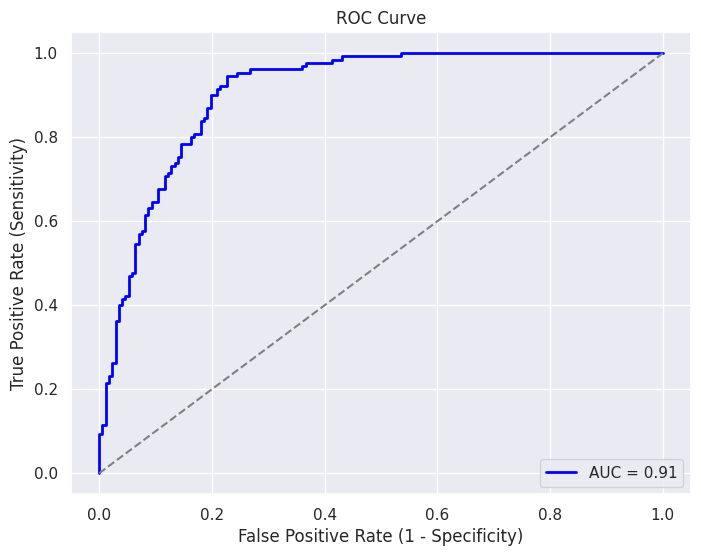

AUC Score: 0.9082289803220036


In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prob_df_text['Fake_text'])

# Calculate AUC score
auc_score = roc_auc_score(y_test, prob_df_text['Fake_text'])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print('AUC Score:', auc_score)






In [ ]:
prob_df_text,importance = print_report(train_vectors,y_train,test_vectors,y_test)

Accuracy score :  0.8377483443708609
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       172
           1       0.76      0.91      0.83       130

    accuracy                           0.84       302
   macro avg       0.84      0.85      0.84       302
weighted avg       0.85      0.84      0.84       302



In [ ]:
#หลังจากใช้ random search
prob_df_text,importance = print_report(train_vectors,y_train,test_vectors,y_test,solv='liblinear',penalty='l2',c=0.1)

Accuracy score :  0.8377483443708609
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       172
           1       0.74      0.95      0.84       130

    accuracy                           0.84       302
   macro avg       0.85      0.85      0.84       302
weighted avg       0.86      0.84      0.84       302



In [ ]:
accuracy_score(y_test, prob_df_text['text_predict'])
predictions = lr_text_classifier.predict(test_vectors)
prob = lr_text_classifier.predict_proba(test_vectors)
prob_df_text = pd.DataFrame(prob,columns = ['Real_text','Fake_text'])
prob_df_text['text_predict'] = predictions

In [ ]:
accuracy_score(y_train, prob_df_text['text_predict'])

0.9331797235023042

In [ ]:
prob_df_text,importance = print_report(train_vectors,y_train,train_vectors,y_train,solv='liblinear',penalty='l2',c=0.1)

Accuracy score :  0.9331797235023042
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1093
           1       0.89      0.98      0.94      1077

    accuracy                           0.93      2170
   macro avg       0.94      0.93      0.93      2170
weighted avg       0.94      0.93      0.93      2170



In [ ]:
print('Accuracy on testing set:', accuracy_score(prob_df_text['text_predict'], y_train))
print('Precision on testing set:', precision_score(prob_df_text['text_predict'], y_train))
print('Recall on testing set:', recall_score(prob_df_text['text_predict'], y_train))
print('F1-score on testing set:', f1_score(prob_df_text['text_predict'], y_train))

Accuracy on testing set: 0.9331797235023042
Precision on testing set: 0.9842154131847726
Recall on testing set: 0.8922558922558923
F1-score on testing set: 0.93598233995585


In [ ]:
prob_df_text,importance = print_report(train_vectors,y_train,valid_vectors,y_valid,solv='liblinear',penalty='l2',c=0.1)

Accuracy score :  0.860036832412523
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       292
           1       0.80      0.94      0.86       251

    accuracy                           0.86       543
   macro avg       0.87      0.87      0.86       543
weighted avg       0.87      0.86      0.86       543



In [ ]:
print('Accuracy on testing set:', accuracy_score(prob_df_text['text_predict'], y_valid))
print('Precision on testing set:', precision_score(prob_df_text['text_predict'], y_valid))
print('Recall on testing set:', recall_score(prob_df_text['text_predict'], y_valid))
print('F1-score on testing set:', f1_score(prob_df_text['text_predict'], y_valid))

Accuracy on testing set: 0.860036832412523
Precision on testing set: 0.9362549800796812
Recall on testing set: 0.7966101694915254
F1-score on testing set: 0.8608058608058607


In [ ]:
prob_df_text,importance = print_report(train_vectors,y_train,test_vectors,y_test,solv='liblinear',penalty='l2',c=0.1)

Accuracy score :  0.8377483443708609
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       172
           1       0.74      0.95      0.84       130

    accuracy                           0.84       302
   macro avg       0.85      0.85      0.84       302
weighted avg       0.86      0.84      0.84       302



In [ ]:
lr_text_classifier = LogisticRegression(solver= 'liblinear',penalty='l2',C=0.1)
lr_text_classifier.fit(train_vectors, y_train)
predictions = lr_text_classifier.predict(train_vectors)
prob = lr_text_classifier.predict_proba(train_vectors)
prob_df_text = pd.DataFrame(prob,columns = ['Real_text','Fake_text'])
prob_df_text['text_predict'] = predictions

Accuracy on testing set: 0.8377483443708609
Precision on testing set: 0.9538461538461539
Recall on testing set: 0.7425149700598802
F1-score on testing set: 0.835016835016835


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

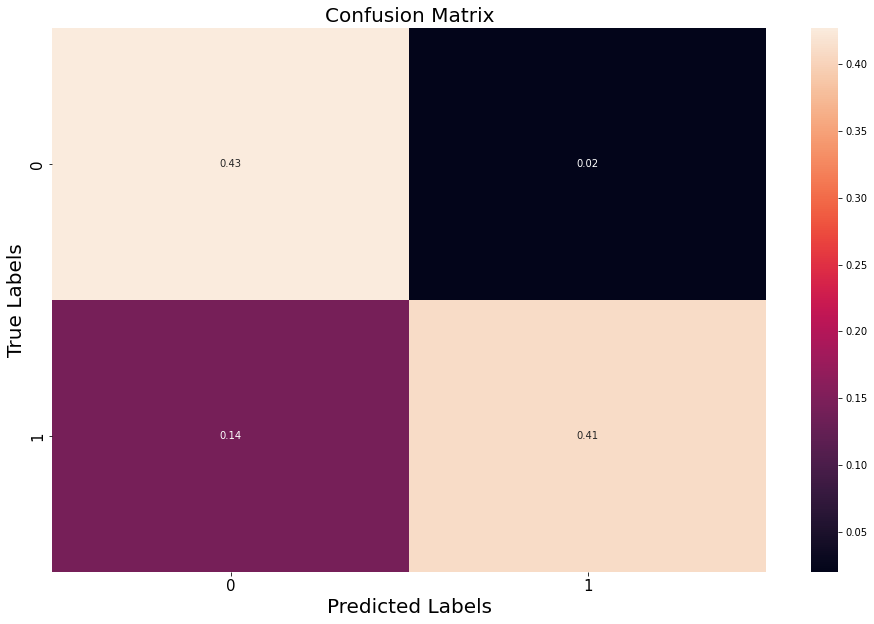

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
print('Accuracy on testing set:', accuracy_score(prob_df_text['text_predict'], y_test))
print('Precision on testing set:', precision_score(prob_df_text['text_predict'], y_test))
print('Recall on testing set:', recall_score(prob_df_text['text_predict'], y_test))
print('F1-score on testing set:', f1_score(prob_df_text['text_predict'], y_test))
import matplotlib.pyplot as plt

import seaborn as sns
matrix = confusion_matrix(prob_df_text['text_predict'], y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

#### importance

In [ ]:
importance.shape

(1, 15546)

In [ ]:
vectorizer.vocabulary_

{'ข่าว': 4502,
 'สื่อ': 11468,
 'ประเด็น': 8005,
 'เรื่อง': 13744,
 'คณบดี': 4593,
 'คณะ': 4594,
 'แพทยศาสตร์': 14490,
 'ศิริราช': 10817,
 'พยาบาล': 8658,
 'แจ้ง': 14286,
 'วิธี': 10655,
 'ปฏิบัติตัว': 7871,
 'แพร่ระบาด': 14504,
 'เชื้อไวรัส': 13000,
 'โควิด': 14771,
 'ศูนย์': 10840,
 'ต่อต้าน': 6555,
 'ปลอม': 8075,
 'ดำเนินการ': 6053,
 'ตรวจสอบ': 6227,
 'ข้อเท็จจริง': 4554,
 'ข่าวประชาสัมพันธ์': 4509,
 'ข้อมูล': 4538,
 'เท็จ': 13220,
 'ส่งต่อ': 11587,
 'คลิป': 4757,
 'เสียง': 13944,
 'โพสต์': 14949,
 'ข้อความ': 4524,
 'เนื้อ': 13273,
 'หาว่า': 11975,
 'วิธีการ': 10656,
 'กลั้วคอ': 3721,
 'น้ำเกลือ': 7570,
 'อุ่นๆ': 12496,
 'ดื่ม': 6108,
 'น้ำ': 7532,
 'มะนาว': 9238,
 'ขิง': 4452,
 'ล้าง': 10451,
 'ออกมา': 12197,
 'ชี้แจง': 5724,
 'ความจริง': 4810,
 'ข้อแนะนำ': 4559,
 'ดังนั้น': 6009,
 'ขอให้': 4401,
 'ประชาชน': 7937,
 'อย่า': 12148,
 'หลงเชื่อ': 11812,
 'ขอความร่วมมือ': 4365,
 'แชร์': 14296,
 'ช่องทาง': 5783,
 'สังคม': 11207,
 'ออนไลน์': 12208,
 'การรับรู้': 4058,
 'ข่าวสาร': 4515,
 '

In [ ]:
feature = list(vectorizer.vocabulary_.keys())

In [ ]:
importance_df = pd.DataFrame(
    {'feature': feature,
     'importance': importance[0]
    })

In [ ]:
importance_df.iloc[importance_df['importance'].nlargest(5).index]

feature  importance
9612            ธี    0.853796
8986    แท้ที่จริง    0.820499
7284      น้ำอัดลม    0.786030
7103  ผู้ใช้บริการ    0.785657
6452          shot    0.760373

In [ ]:
importance_df.iloc[importance_df['importance'].nsmallest(5).index]

feature  importance
10864             said   -1.692822
10840           clinic   -1.629392
5724   thestandardnews   -1.551284
8652             ตาบอด   -1.486685
2333     นักท่องเที่ยว   -1.326616

In [ ]:
prob_df_text.sample(5)

Real_text  Fake_text  text_predict
94    0.998160   0.001840             0
92    0.532577   0.467423             0
8     0.999984   0.000016             0
219   0.993638   0.006362             0
218   0.000877   0.999123             1

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
print('Accuracy on testing set:', accuracy_score(prob_df_text['text_predict'], y_test))
print('Precision on testing set:', precision_score(prob_df_text['text_predict'], y_test))
print('Recall on testing set:', recall_score(prob_df_text['text_predict'], y_test))
print('F1-score on testing set:', f1_score(prob_df_text['text_predict'], y_test))

Accuracy on testing set: 0.8377483443708609
Precision on testing set: 0.9076923076923077
Recall on testing set: 0.7612903225806451
F1-score on testing set: 0.8280701754385965


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

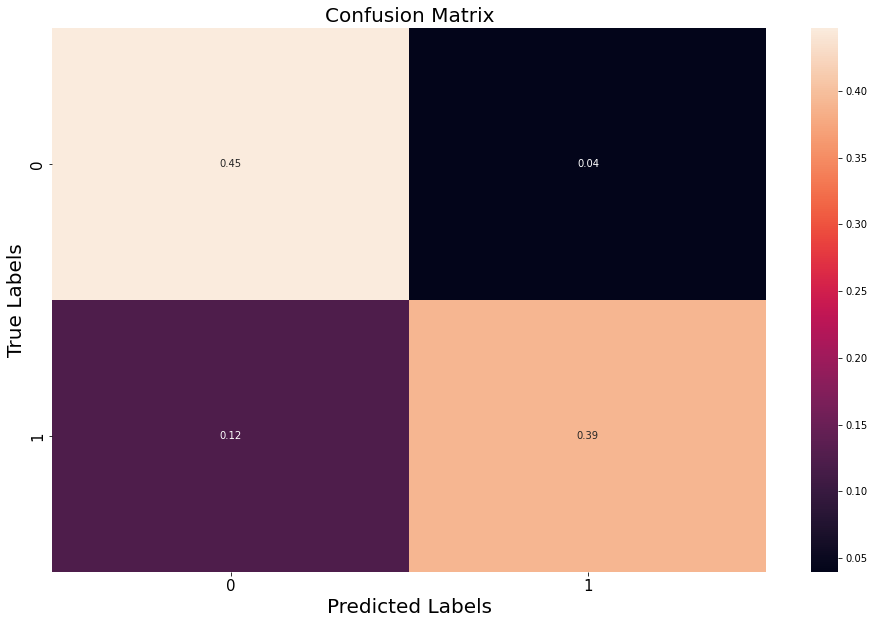

In [ ]:

import seaborn as sns
matrix = confusion_matrix(prob_df_text['text_predict'], y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

#### grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search
LR_search.fit(train_vectors , y_train)
LR_search.best_params_

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# define model
model = LogisticRegression()

In [ ]:
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [ ]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(train_vectors, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8419967802619204
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}


# Word Embedding

[เว็บไซต์ที่มาของโค้ด](https://bigdata.go.th/big-data-101/word2vec-ii/)  
**การฝึกฝนโมเดลตระกูล Word2Vec**  


*   sentences เป็นข้อมูลที่เราใช้เพื่อ train โมเดล โดยจะอยู่ในลักษณะของ list ของ list ของ tokens (ในกรณีนี้คือ list ที่มี list หลายอันอยู่ด้านใน และข้อมูลภายใน list ด้านในคือคำแต่ละคำของข้อความ/เอกสาร
หมายเหตุ: ถึงแม้ว่าชื่อของ input นี้จะเรียกว่า sentences แต่ข้อมูลที่เราเลือกจะใส่ในแต่ละอันในกรณีนี้จะเป็นข้อมูลของเอกสารทั้งเอกสาร การทำเช่นนี้จะช่วยให้เราจะสามารถหาความสัมพันธ์ระหว่างประโยคได้ด้วย
*   size เป็นจำนวนมิติของ embedding layer (ขนาดของ embedded  vector) ที่เราต้องการ
* window คือระยะทางสูงสุดจากคำที่กำลังใช้ฝึกฝน (จำนวนคำ) ที่นับว่าคำที่เจอเป็นบริบทของคำที่กำลังใช้ฝึกฝนอยู่
* min_count คือ จำนวนการปรากฏขั้นต่ำของคำที่จะนำมาใช้ในการ train โมเดล (คำที่มีจำนวนครั้งการปรากฏรวมกันในเอกสารทั้งหมดต่ำกว่าค่าที่กำหนดนี้จะไม่ถูกนำมาใช้ train โมเดล เพราะถือว่าปรากฏน้อยเกินกว่าที่จะนำไปใช้ train ได้อย่างมีนัยสำคัญ)
* worker คือจำนวนของ (computer) threads ที่จะใช้ในการ train
* sg คือการตั้งค่าว่าจะ train ด้วย Word2Vec ตระกูล Skip-gram หรือไม่ (0 คือ train ด้วย CBOW, 1 คือ train ด้วย Skip-gram โดยปกติแล้ว Skip-gram จะใช้เวลา train ที่นานกว่า)
* epochs คือการกำหนดจำนวนรอบที่โมเดลจะ train จากข้อมูลที่กำหนดให้



# Deep learning Model

In [ ]:
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras import layers

In [ ]:
X_train_rnn = tf.keras.preprocessing.sequence.pad_sequences(X_train_rnn, padding='post', maxlen=256)
X_test_rnn = tf.keras.preprocessing.sequence.pad_sequences(X_test_rnn, padding='post', maxlen=256)
X_valid_rnn = tf.keras.preprocessing.sequence.pad_sequences(X_valid_rnn, padding='post', maxlen=256)

In [ ]:
vocab_size = len(my_dict.keys())+1
emdedding_size = 100 #vector size

### DNN

In [ ]:
X_train_dnn, X_valid_dnn, y_train_dnn,y_valid_dnn = train_test_split(train_vectors_array,y_train, test_size=0.2, random_state=42)

In [ ]:
X_train_dnn = X_train_dnn[:,:10000]
X_valid_dnn = X_valid_dnn[:,:10000]

In [ ]:
X_test_dnn = test_vectors_array[:,:10000]

In [ ]:
y_train_dnn.shape

(2170,)

#### 10000 features model

In [ ]:
from keras.utils.vis_utils import plot_model
model = Sequential()
# model.add(Flatten())
model.add(Dense(128, input_shape=(None, 10000),activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

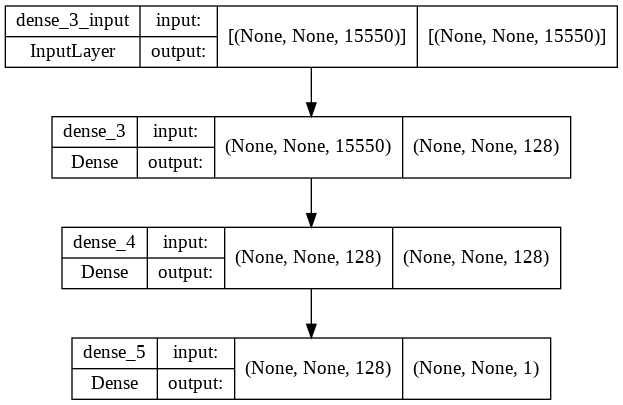

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(None, 15550),activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, None, 128)         1280128   
                                                                 
 dense_24 (Dense)            (None, None, 128)         16512     
                                                                 
 dense_25 (Dense)            (None, None, 1)           129       
                                                                 
Total params: 1,296,769
Trainable params: 1,296,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 3029
tf.random.set_seed(42)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_dnn, y_train_dnn, epochs=20,validation_data=(X_valid_dnn,y_valid_dnn), batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/20
73/73 [==============================] - 2s 14ms/step - loss: 0.5093 - accuracy: 0.7673 - val_loss: 0.4011 - val_accuracy: 0.8527
Epoch 2/20
73/73 [==============================] - 1s 12ms/step - loss: 0.2416 - accuracy: 0.9134 - val_loss: 0.4309 - val_accuracy: 0.8453
Epoch 3/20
73/73 [==============================] - 1s 11ms/step - loss: 0.1413 - accuracy: 0.9498 - val_loss: 0.4744 - val_accuracy: 0.8490
Epoch 4/20
73/73 [==============================] - 1s 11ms/step - loss: 0.0932 - accuracy: 0.9673 - val_loss: 0.5470 - val_accuracy: 0.8453
Epoch 5/20
73/73 [==============================] - 1s 11ms/step - loss: 0.0687 - accuracy: 0.9751 - val_loss: 0.6046 - val_accuracy: 0.8343
Epoch 6/20
73/73 [==============================] - 1s 11ms/step - loss: 0.0553 - accuracy: 0.9760 - val_loss: 0.6547 - val_accuracy: 0.8379


Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


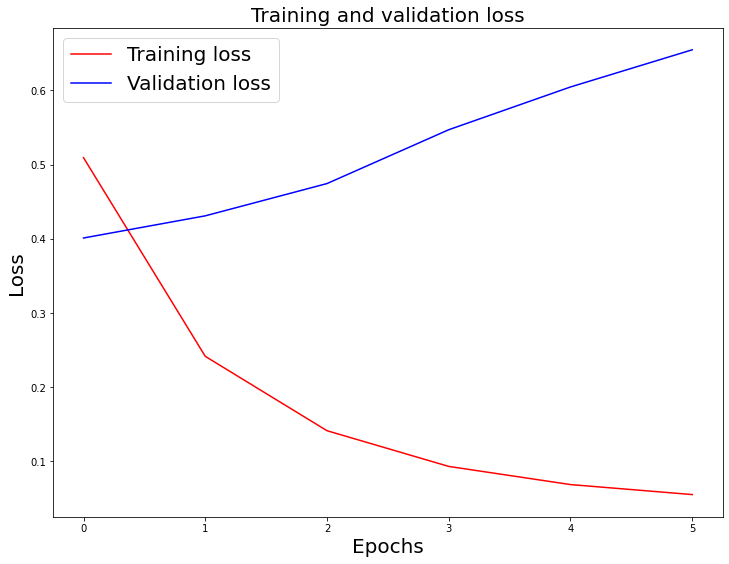

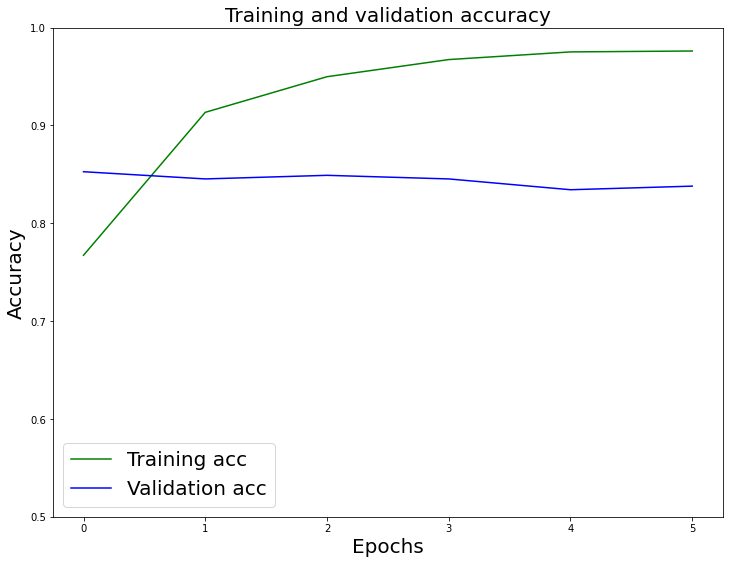

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [ ]:
model.evaluate(X_test_dnn, y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.3937 - accuracy: 0.8278


[0.3937121331691742, 0.8278145790100098]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
pred = model.predict(X_test_dnn)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))
print('F1-score on testing set:', f1_score(binary_predictions, y_test))

Accuracy on testing set: 0.8278145695364238
Precision on testing set: 0.8769230769230769
Recall on testing set: 0.76
F1-score on testing set: 0.8142857142857143


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

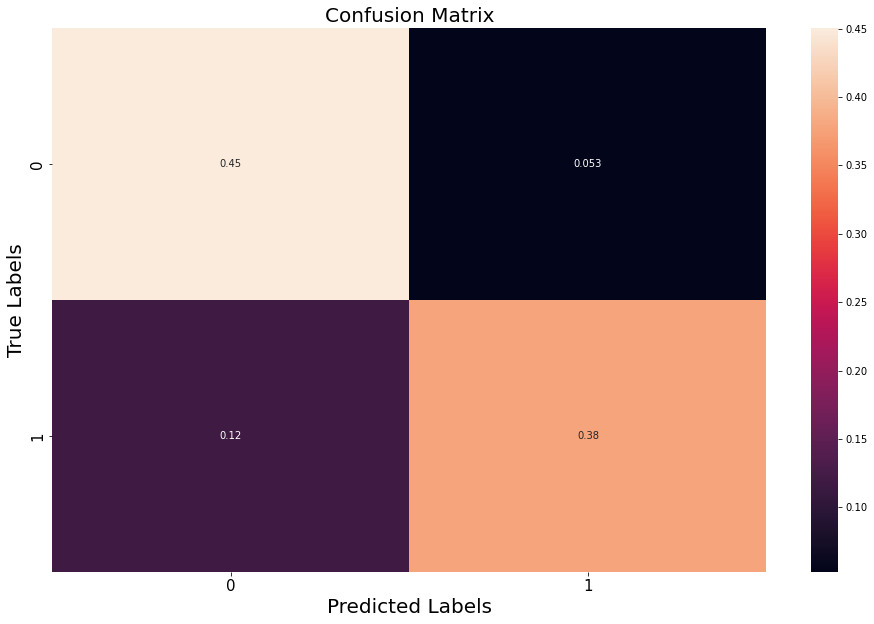

In [ ]:
import seaborn as sns
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

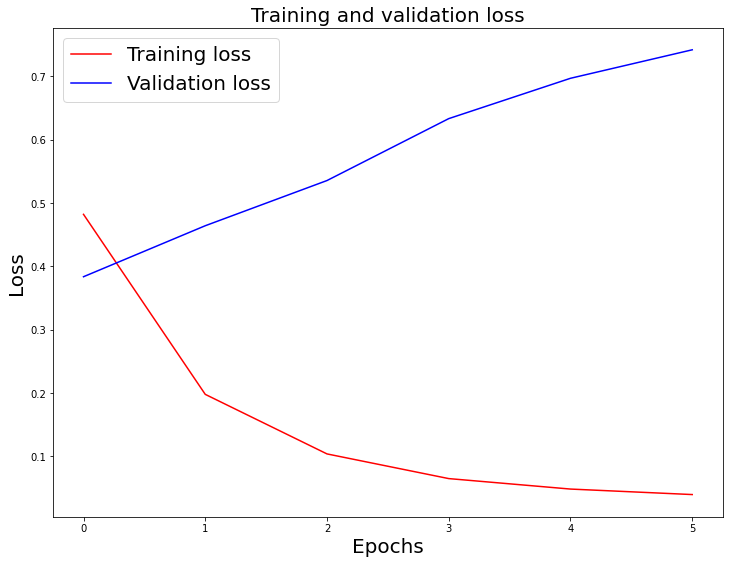

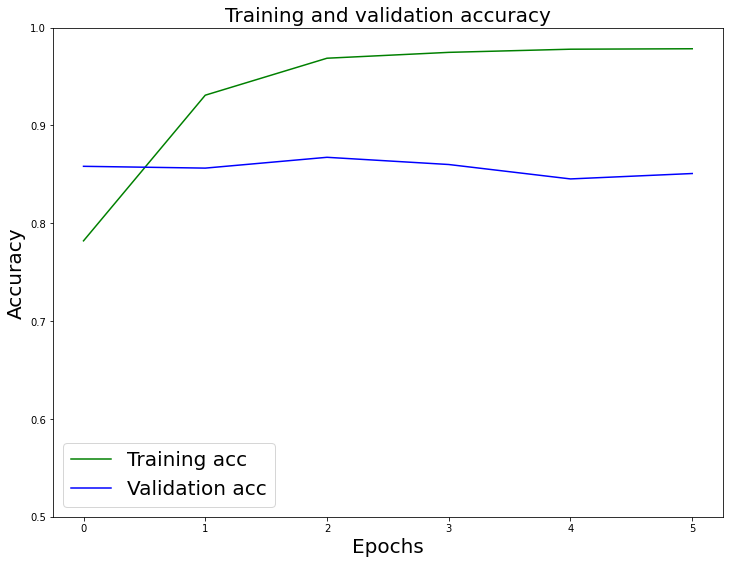

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

#### all feature model

In [ ]:
model = Sequential()
# model.add(Flatten())
model.add(Dense(128, input_shape=(None, 15546),activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, None, 128)         1990016   
                                                                 
 dense_18 (Dense)            (None, None, 128)         16512     
                                                                 
 dense_19 (Dense)            (None, None, 1)           129       
                                                                 
Total params: 2,006,657
Trainable params: 2,006,657
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 3029
tf.random.set_seed(42)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_dnn, y_train_dnn, epochs=20,validation_data=(X_valid_dnn,y_valid_dnn), batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/20
73/73 [==============================] - 2s 16ms/step - loss: 0.4821 - accuracy: 0.7820 - val_loss: 0.3836 - val_accuracy: 0.8582
Epoch 2/20
73/73 [==============================] - 1s 13ms/step - loss: 0.1977 - accuracy: 0.9309 - val_loss: 0.4641 - val_accuracy: 0.8564
Epoch 3/20
73/73 [==============================] - 1s 13ms/step - loss: 0.1036 - accuracy: 0.9687 - val_loss: 0.5355 - val_accuracy: 0.8674
Epoch 4/20
73/73 [==============================] - 1s 13ms/step - loss: 0.0646 - accuracy: 0.9747 - val_loss: 0.6334 - val_accuracy: 0.8600
Epoch 5/20
73/73 [==============================] - 1s 13ms/step - loss: 0.0481 - accuracy: 0.9779 - val_loss: 0.6971 - val_accuracy: 0.8453
Epoch 6/20
73/73 [==============================] - 1s 13ms/step - loss: 0.0394 - accuracy: 0.9783 - val_loss: 0.7421 - val_accuracy: 0.8508


In [ ]:
model.evaluate(test_vectors_array, y_test)

10/10 [==============================] - 17s 2s/step - loss: 0.3858 - accuracy: 0.8411


[0.38575470447540283, 0.8410596251487732]

In [ ]:
pred = model.predict(test_vectors_array)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

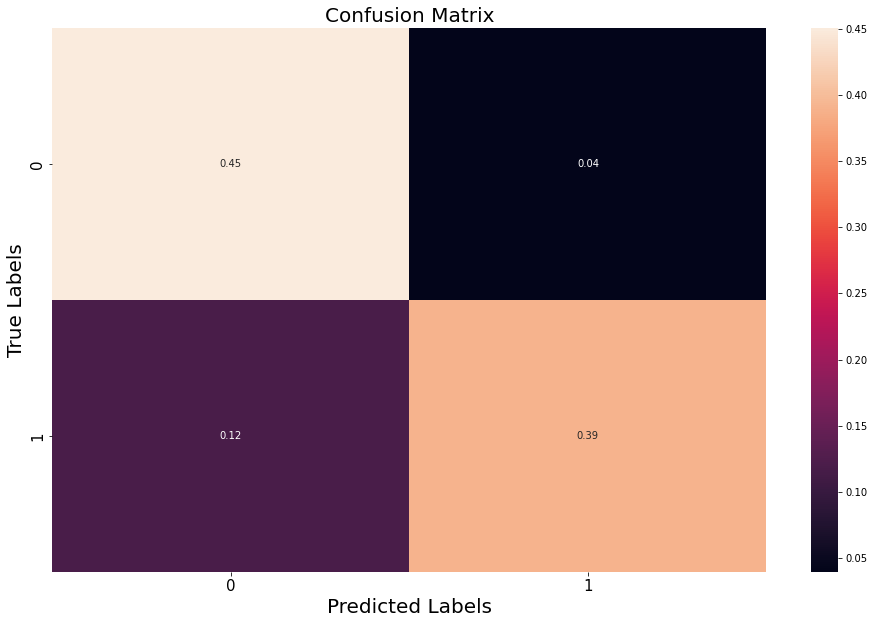

In [ ]:
import seaborn as sns
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

#### model improvement

In [ ]:
! pip install keras-tuner

     |████████████████████████████████| 98 kB 5.6 MB/s 


In [ ]:
tf.random.set_seed(100)

def build_model(hp):
    '''
    Builds model and sets up hyperparameter space to search.

    Parameters
    ----------
    hp : HyperParameter object
        Configures hyperparameters to tune.

    Returns
    -------
    model : keras model
        Compiled model with hyperparameters to tune.
    '''
    # build the model
    model = models.Sequential()
    Flatten(input_shape=(X.shape[1:],))
    for i in range(hp.Int("num_layers", 1, 5)):
      model.add(Dense(units=hp.Int("units_" + str(i), min_value=128, max_value=256, step=1), activation=hp.Choice("activation", values=['relu', 'elu', 'selu']))) #Choose a random item from the list securely
      model.add(Dropout(hp.Float("dropout_" + str(i), 0, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    #
    # compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float("lr", 1e-4, 1e-2, sampling ='log')),
                  loss='mean_absolute_error',
                  metrics=['accuracy'])

    return model

In [ ]:
import kerastuner as kt
# Instantiate the tuner
tuner = kt.Hyperband(build_model, # A HyperModel - takes a hyperparameter and return model instance
                     objective="val_accuracy", # metrics to be optimized
                     max_epochs=5, # the maximum number of epochs to train one model
                     factor=3, # the reduction factor for the number of epoch
                     hyperband_iterations=5, # the number of times to iterate over the full Hyperband algorithm
                     directory="kt_dir", # saves logs and checkpoints for each trial run during the hyperparameter search
                     project_name="kt_hyperband",overwrite=True) # differentiate with other runs and is a subdirectory under directory
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train_dnn,y_train_dnn, epochs=5, validation_data=(X_valid_dnn,y_valid_dnn), callbacks=[stop_early], verbose=2)

Trial 50 Complete [00h 00m 07s]
val_accuracy: 0.8471454977989197

Best val_accuracy So Far: 0.8692449331283569
Total elapsed time: 00h 04m 26s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hp=tuner.get_best_hyperparameters()[0]
print(best_hp.get('units_0'))
print(best_hp.get('lr'))
print(best_hp.get('num_layers'))
print(best_hp.get('activation'))
print(best_hp.get('dropout_0'))

153
0.00021027527328709548
2
relu
0.4


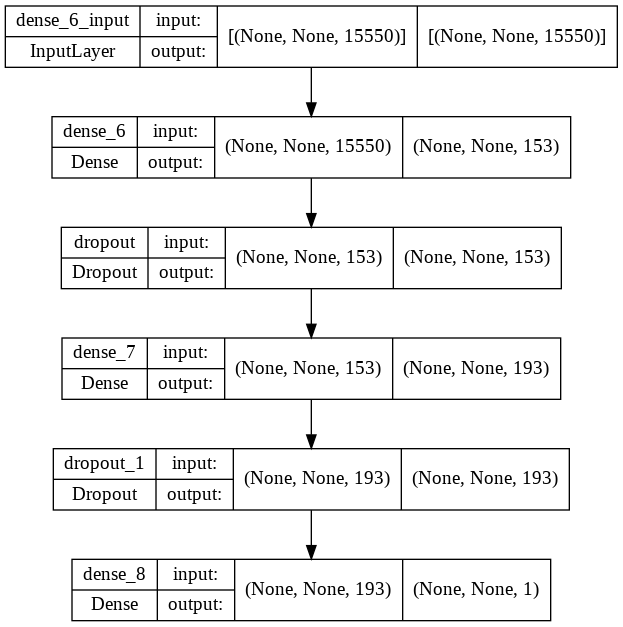

In [ ]:
model = Sequential()
model.add(Dense(153, input_shape=(None, 15550),activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(193, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model = tuner.hypermodel.build(best_hp)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_dnn, y_train_dnn, epochs=20,validation_data=(X_valid_dnn,y_valid_dnn), callbacks=[early_stop])
model.summary()

Epoch 1/20
68/68 [==============================] - 1s 14ms/step - loss: 0.4765 - accuracy: 0.6834 - val_loss: 0.4230 - val_accuracy: 0.7919
Epoch 2/20
68/68 [==============================] - 1s 12ms/step - loss: 0.3577 - accuracy: 0.8175 - val_loss: 0.2842 - val_accuracy: 0.8343
Epoch 3/20
68/68 [==============================] - 1s 12ms/step - loss: 0.2336 - accuracy: 0.8636 - val_loss: 0.2091 - val_accuracy: 0.8490
Epoch 4/20
68/68 [==============================] - 1s 12ms/step - loss: 0.1573 - accuracy: 0.8866 - val_loss: 0.1808 - val_accuracy: 0.8564
Epoch 5/20
68/68 [==============================] - 1s 12ms/step - loss: 0.1190 - accuracy: 0.9101 - val_loss: 0.1623 - val_accuracy: 0.8692
Epoch 6/20
68/68 [==============================] - 1s 12ms/step - loss: 0.0950 - accuracy: 0.9249 - val_loss: 0.1558 - val_accuracy: 0.8711
Epoch 7/20
68/68 [==============================] - 1s 13ms/step - loss: 0.0794 - accuracy: 0.9350 - val_loss: 0.1558 - val_accuracy: 0.8545
Epoch 8/20
68

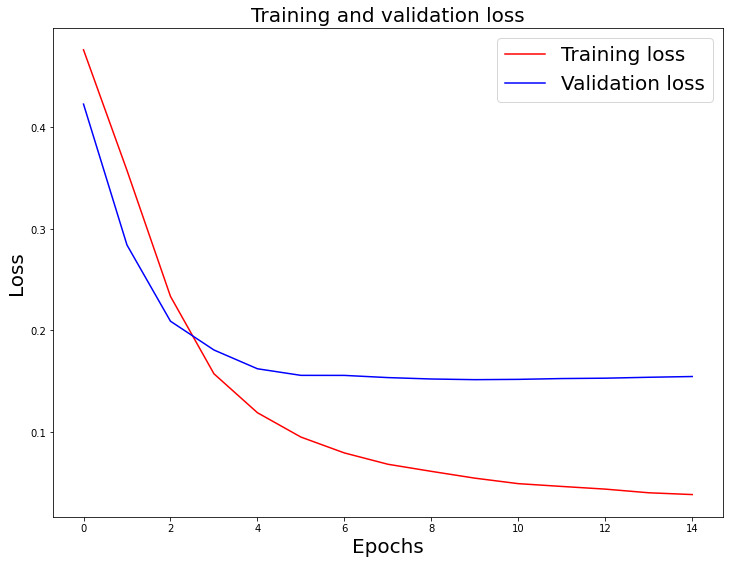

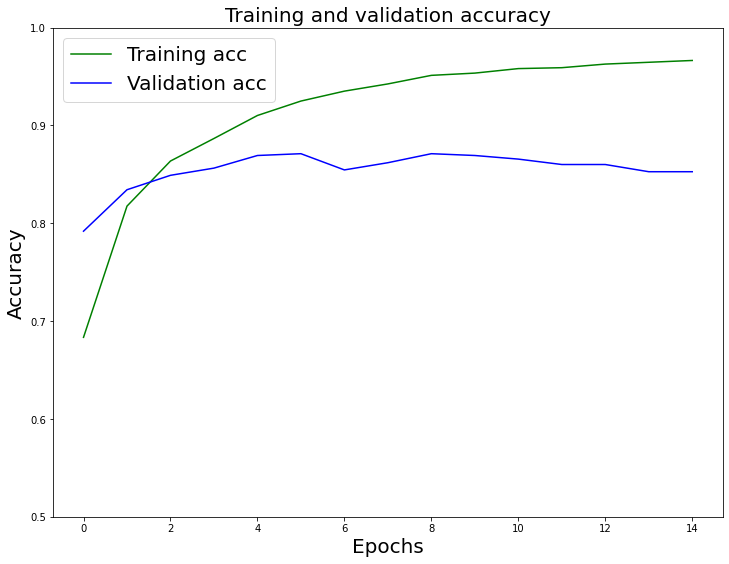

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [ ]:
model.evaluate(X_test_dnn, y_test)

10/10 [==============================] - 0s 5ms/step - loss: 0.1818 - accuracy: 0.8245


[0.1817643642425537, 0.8245033025741577]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
pred = model.predict(X_test_dnn)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))
print('F1-score on testing set:', f1_score(binary_predictions, y_test))

Accuracy on testing set: 0.8245033112582781
Precision on testing set: 0.9153846153846154
Recall on testing set: 0.7391304347826086
F1-score on testing set: 0.8178694158075601


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

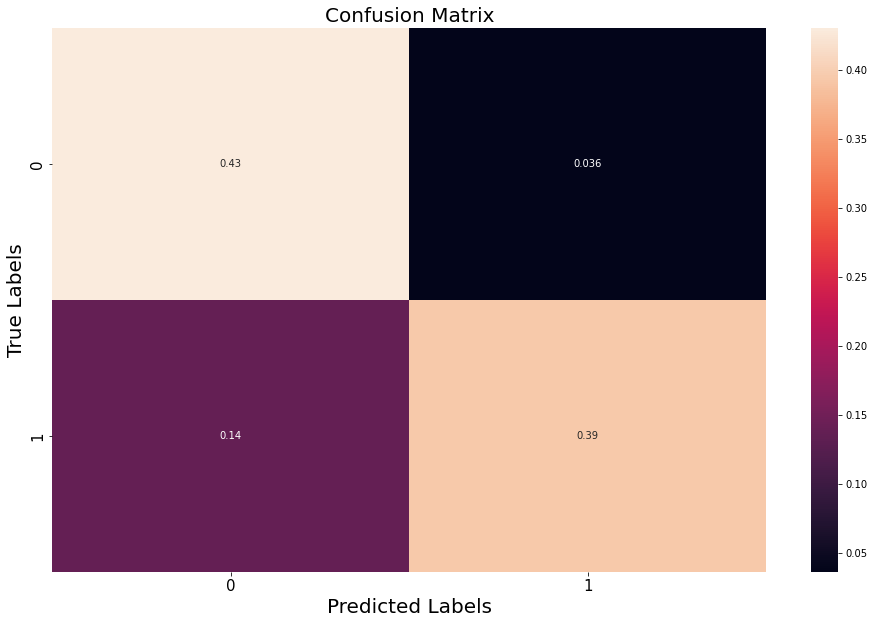

In [ ]:
import seaborn as sns
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

### RNN

In [ ]:
tf.random.set_seed(1)
model_rnn = Sequential()
model_rnn.add(LSTM(units=128, input_shape=(None, 100), return_sequences=True))
model_rnn.add(LSTM(units=128, return_sequences=True))
model_rnn.add(LSTM(units=128, return_sequences=False))
model_rnn.add(Dense(1, activation='sigmoid'))

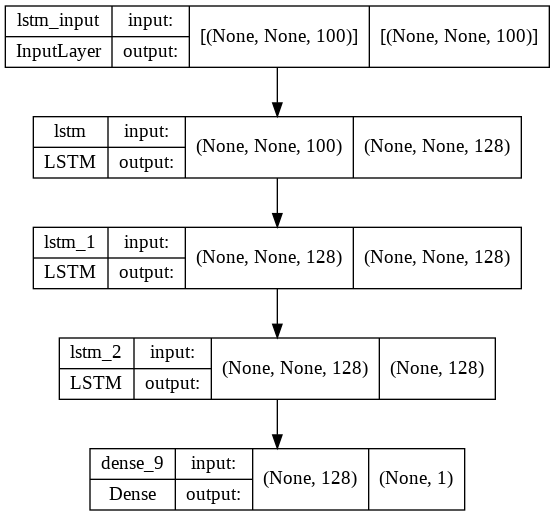

In [ ]:
plot_model(model_rnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_rnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, None, 128)         117248    
                                                                 
 lstm_4 (LSTM)               (None, None, 128)         131584    
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 380,545
Trainable params: 380,545
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 3029
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_rnn.fit(X_train_rnn, y_train_rnn, epochs=40,validation_data=(X_valid_rnn,y_valid), batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/40
73/73 [==============================] - 160s 2s/step - loss: 0.6927 - accuracy: 0.5088 - val_loss: 0.6900 - val_accuracy: 0.4733
Epoch 2/40
73/73 [==============================] - 151s 2s/step - loss: 0.6760 - accuracy: 0.5226 - val_loss: 0.6693 - val_accuracy: 0.5599
Epoch 3/40
73/73 [==============================] - 151s 2s/step - loss: 0.5955 - accuracy: 0.7226 - val_loss: 0.6232 - val_accuracy: 0.7053
Epoch 4/40
73/73 [==============================] - 151s 2s/step - loss: 0.5702 - accuracy: 0.7382 - val_loss: 0.6192 - val_accuracy: 0.6998
Epoch 5/40
73/73 [==============================] - 151s 2s/step - loss: 0.5828 - accuracy: 0.7171 - val_loss: 0.6708 - val_accuracy: 0.6924
Epoch 6/40
73/73 [==============================] - 151s 2s/step - loss: 0.6101 - accuracy: 0.6664 - val_loss: 0.6568 - val_accuracy: 0.7035
Epoch 7/40
73/73 [==============================] - 152s 2s/step - loss: 0.5299 - accuracy: 0.7816 - val_loss: 0.5483 - val_accuracy: 0.7385
Epoch 8/40
73

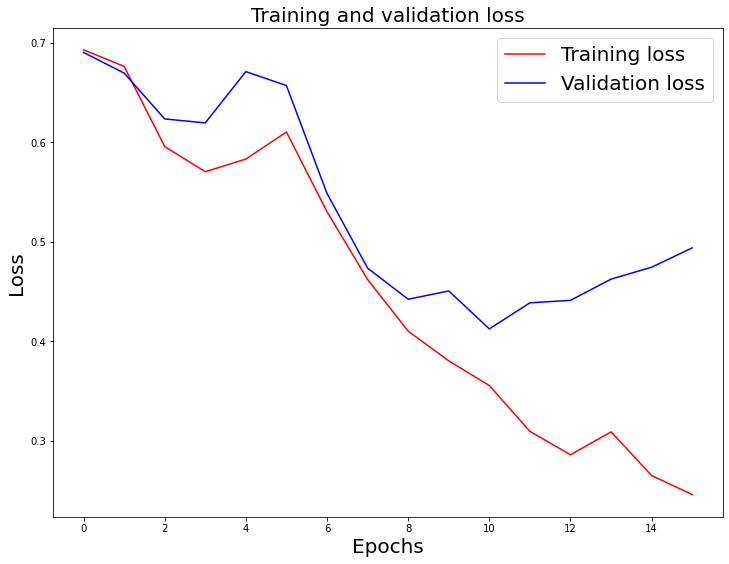

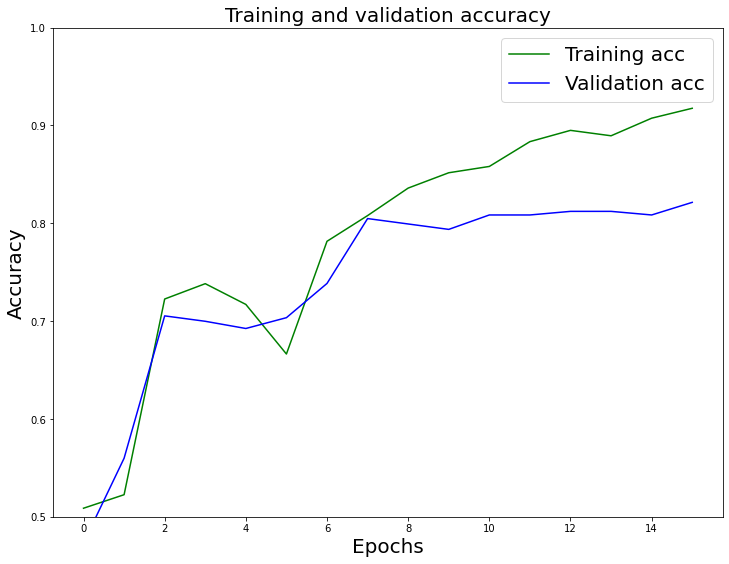

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [ ]:
model_rnn.evaluate(X_test_rnn, y_test)

10/10 [==============================] - 3s 274ms/step - loss: 0.4340 - accuracy: 0.8013


[0.43399274349212646, 0.8013244867324829]

In [ ]:
pred = model_rnn.predict(X_test_rnn)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))
print('F1-score on testing set:', f1_score(binary_predictions, y_test))

Accuracy on testing set: 0.8013245033112583
Precision on testing set: 0.8923076923076924
Recall on testing set: 0.7160493827160493
F1-score on testing set: 0.7945205479452054


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

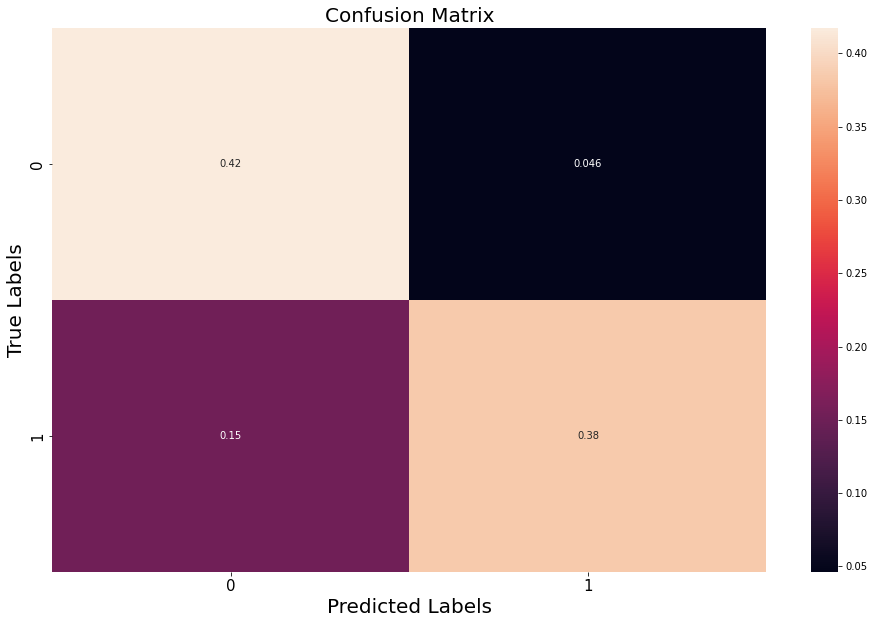

In [ ]:
import seaborn as sns
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

# tune rnn

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=128,max_value=256,step=32),return_sequences=True, input_shape=(None, 100)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=128,max_value=256,step=32),return_sequences=True))
        model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_absolute_error', optimizer='adam',metrics = ['accuracy'])
    return model

In [ ]:
import kerastuner as kt
# Instantiate the tuner
tuner = kt.Hyperband(build_model, # A HyperModel - takes a hyperparameter and return model instance
                     objective="val_accuracy", # metrics to be optimized
                     max_epochs=5, # the maximum number of epochs to train one model
                     factor=3, # the reduction factor for the number of epoch
                     hyperband_iterations=5, # the number of times to iterate over the full Hyperband algorithm
                     directory="kt_dir", # saves logs and checkpoints for each trial run during the hyperparameter search
                     project_name="kt_hyperband",overwrite=True) # differentiate with other runs and is a subdirectory under directory
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train_rnn,y_train_rnn, epochs=5, validation_data=(X_valid_rnn,y_valid), callbacks=[stop_early], verbose=2)



Trial 14 Complete [00h 10m 46s]
val_accuracy: 0.7351303696632385

Best val_accuracy So Far: 0.8028530478477478
Total elapsed time: 02h 44m 09s

Search: Running Trial #15

Hyperparameter    |Value             |Best Value So Far 
input_unit        |224               |192               
n_layers          |3                 |2                 
lstm_0_units      |160               |160               
Dropout_rate      |0.2               |0.1               
lstm_1_units      |160               |256               
lstm_2_units      |224               |160               
lstm_3_units      |192               |None              
tuner/epochs      |2                 |5                 
tuner/initial_e...|0                 |0                 
tuner/bracket     |1                 |0                 
tuner/round       |0                 |0                 

Epoch 1/2


KeyboardInterrupt: ignored

In [ ]:
tf.random.set_seed(1)
model_rnn = Sequential()
model_rnn.add(LSTM(units=192, input_shape=(None, 100), return_sequences=True))
model_rnn.add(LSTM(units=160, return_sequences=True))
model_rnn.add(Dropout(0.1))
model_rnn.add(LSTM(units=256, return_sequences=True))
model_rnn.add(LSTM(units=160, return_sequences=False))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(loss='mean_absolute_error', optimizer='adam',metrics = ['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_rnn.fit(X_train_rnn, y_train_rnn, epochs=40,validation_data=(X_valid_rnn,y_valid), batch_size=256, shuffle=True, callbacks=[early_stop])
model.summary()

Epoch 1/40
9/9 [==============================] - 152s 16s/step - loss: 0.4952 - accuracy: 0.5088 - val_loss: 0.4425 - val_accuracy: 0.5635
Epoch 2/40
9/9 [==============================] - 139s 15s/step - loss: 0.3137 - accuracy: 0.6885 - val_loss: 0.3446 - val_accuracy: 0.6556
Epoch 3/40
9/9 [==============================] - 139s 16s/step - loss: 0.3531 - accuracy: 0.6470 - val_loss: 0.3905 - val_accuracy: 0.6096
Epoch 4/40
9/9 [==============================] - 139s 15s/step - loss: 0.3936 - accuracy: 0.6065 - val_loss: 0.4365 - val_accuracy: 0.5635
Epoch 5/40
9/9 [==============================] - 139s 15s/step - loss: 0.4161 - accuracy: 0.5839 - val_loss: 0.4512 - val_accuracy: 0.5488
Epoch 6/40
9/9 [==============================] - 139s 15s/step - loss: 0.4254 - accuracy: 0.5747 - val_loss: 0.4530 - val_accuracy: 0.5470
Epoch 7/40
9/9 [==============================] - 139s 15s/step - loss: 0.4295 - accuracy: 0.5705 - val_loss: 0.4549 - val_accuracy: 0.5451


NameError: ignored

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [ ]:
model_rnn.evaluate(X_test_rnn, y_test)